<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-description" data-toc-modified-id="Data-description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data description</a></span></li><li><span><a href="#Data-upload" data-toc-modified-id="Data-upload-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data upload</a></span></li><li><span><a href="#Filtering" data-toc-modified-id="Filtering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Filtering</a></span></li><li><span><a href="#Normalization" data-toc-modified-id="Normalization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Normalization</a></span></li><li><span><a href="#Venn-diagram" data-toc-modified-id="Venn-diagram-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Venn diagram</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Outliers</a></span><ul class="toc-item"><li><span><a href="#Let's-take-a-look-on-the-data-without-outliers" data-toc-modified-id="Let's-take-a-look-on-the-data-without-outliers-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Let's take a look on the data without outliers</a></span></li></ul></li><li><span><a href="#Volcano-plot" data-toc-modified-id="Volcano-plot-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Volcano plot</a></span></li><li><span><a href="#FoldChangeGraph" data-toc-modified-id="FoldChangeGraph-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>FoldChangeGraph</a></span></li><li><span><a href="#Variance-estimation" data-toc-modified-id="Variance-estimation-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Variance estimation</a></span><ul class="toc-item"><li><span><a href="#Test-the-variance-vectors-for-normality" data-toc-modified-id="Test-the-variance-vectors-for-normality-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Test the variance vectors for normality</a></span></li></ul></li><li><span><a href="#Gene-encoding" data-toc-modified-id="Gene-encoding-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Gene encoding</a></span></li><li><span><a href="#Results-comparison-for-DLPFC-between-datasets" data-toc-modified-id="Results-comparison-for-DLPFC-between-datasets-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Results comparison for DLPFC between datasets</a></span></li><li><span><a href="#Сhange-proportion-comparison-between-articles-and-lipids" data-toc-modified-id="Сhange-proportion-comparison-between-articles-and-lipids-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Сhange proportion comparison between articles and lipids</a></span></li><li><span><a href="#Pathway-enrichment-analysis" data-toc-modified-id="Pathway-enrichment-analysis-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Pathway enrichment analysis</a></span><ul class="toc-item"><li><span><a href="#By-regions" data-toc-modified-id="By-regions-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>By regions</a></span></li></ul></li></ul></div>

Notion: https://www.notion.so/SHZ-and-MDD-research-989fdc493acd445086df6df71a427164

Article: https://genomemedicine.biomedcentral.com/articles/10.1186/s13073-017-0458-5#MOESM2

Geo datasets: **GSE80655**

In [12]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

from sklearn.decomposition import PCA

from matplotlib_venn import venn2
import scanpy as sc

from scipy import stats
from scipy.stats import linregress
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

from pybiomart import Server

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
sns.set_theme('notebook') 

## Data description

RNA sequencing was performed on tissue from the anterior cingulate cortex, dorsolateral prefrontal cortex, and nucleus accumbens from groups of 24 patients each diagnosed with schizophrenia, major depressive disorder, and from 24 control subjects. 

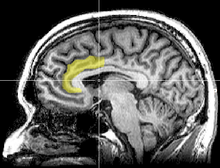

In [15]:
Image("220px-MRI_anterior_cingulate.png", width=320, height=240)#передняя поясная кора

In the human brain, the **anterior cingulate cortex (AnCg)** is the frontal part of the cingulate cortex that resembles a "collar" surrounding the frontal part of the corpus callosum.

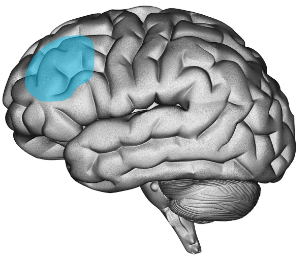

In [16]:
Image("image-dpfc.png", width=320, height=240)

The **dorsolateral prefrontal cortex (DLPFC)** is an area in the prefrontal cortex of the brain.

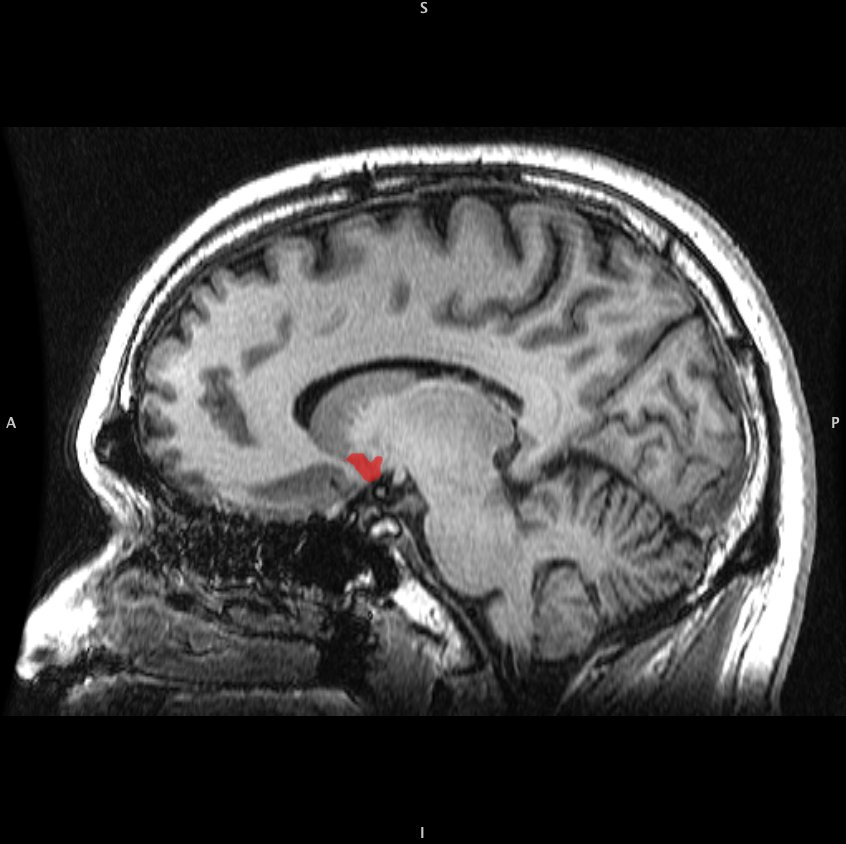

In [17]:
Image("Nucleus_accumbens_sag.jpg", width=320, height=240)#прилежащее ядро (стриатум)

**Nucleus accumbens (NAcc)** is a group of neurons in the ventral part of the striatum (basal nuclei)

## Data upload

In [18]:
data = pd.read_excel('article 2 data (1).xlsx')
data = data.set_index('gene_id').astype(int)
data

,SL31501,SL31502,SL31503,SL31504,SL31505,SL31506,SL31507,SL31508,SL32225,SL32226,...,SL7849,SL7851,SL7852,SL7853,SL7854,SL7855,SL7856,SL7857,SL7858,SL8435
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972,0,0,0,0,0,0,0,0,3,0,...,1,0,0,0,0,2,0,1,1,0
ENSG00000227232,93,80,116,50,233,113,119,146,225,156,...,147,166,118,74,88,194,121,83,418,50
ENSG00000243485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000237613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000268020,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695,21277,15669,22438,18113,47014,42762,69277,42661,39282,25454,...,85489,120932,100473,75099,136268,109760,113916,361936,121552,85294
ENSG00000210194,0,0,0,0,0,2,1,0,0,0,...,2,0,7,4,3,2,2,17,5,0
ENSG00000198727,195813,179689,236581,237411,541391,448690,528267,494724,361522,288285,...,547146,430426,778192,312763,453783,398099,515982,1525853,844208,510450


In [19]:
#column_names = ['Patient', 'Region', 'Disease', 'Sample']
samples = pd.read_excel('samples_article_2.xlsx', header=None, names='N')
samples[['Patient', 'Region', 'Disease', 'Sample']] = samples['N'].str.split('_', expand=True)
samples = samples.set_index('Sample').drop('N', axis=1).query("Disease != 'B'")
samples


,Patient,Region,Disease
Sample,,,
SL6608,X4656,nAcc,S
SL6606,X2292,nAcc,C
SL6605,X1834,nAcc,C
SL6417,X4001,AnCg,M
SL6416,X3481,AnCg,M
...,...,...,...
SL7856,X4357,nAcc,S
SL7855,X4296,nAcc,S
SL7852,X3982,nAcc,M


In [20]:
#getting rid of bipolar samples
data = data.loc[:,data.columns.isin(samples.index)]

## Filtering

In [21]:
percent_zeros = data.apply(lambda x: (x == 0).mean() * 100, axis=1)

In [22]:
# percent_zeros[percent_zeros.index == 'ENSG00000186807']

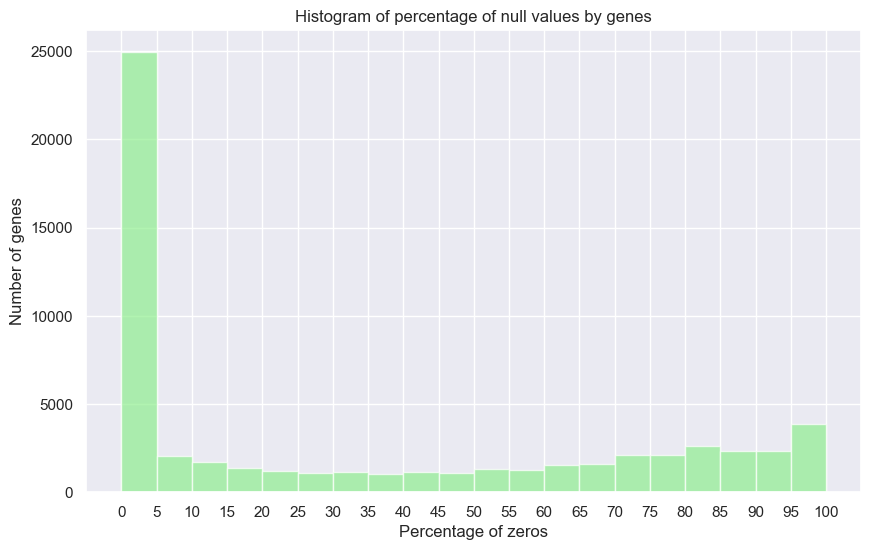

In [23]:
#hist for zero percentage for each gene

plt.figure(figsize=(10, 6))
plt.hist(percent_zeros, bins=20, color='lightgreen', alpha=0.7)
plt.title('Histogram of percentage of null values by genes')
plt.xlabel('Percentage of zeros')
plt.ylabel('Number of genes')
plt.xticks(range(0, 101, 5))
plt.grid(True)
plt.show()

In [24]:
percent_zeros[percent_zeros > 90]

gene_id
ENSG00000243485     98.095238
ENSG00000237613     99.523810
ENSG00000268020     90.952381
ENSG00000186092     90.476190
ENSG00000239945    100.000000
                      ...    
ENSG00000210107     99.047619
ENSG00000210127     98.571429
ENSG00000210135     99.047619
ENSG00000210151     99.047619
ENSG00000210156     95.238095
Length: 5945, dtype: float64

In [25]:
#Filtering out unexpressed genes
condition = percent_zeros < 90
expressed_probes = condition[condition].index.tolist()
print("Number of probes before filtering: ", data.shape[0])
print("Number of probes above threshold: ", len(expressed_probes))

Number of probes before filtering:  57905
Number of probes above threshold:  51726


In [26]:
data = data.drop(['ENSG00000265830', 'ENSG00000186807', 'ENSG00000237546', 
                 'ENSG00000228361', 'ENSG00000212365', 'ENSG00000229606'], axis=0)
data

,SL31501,SL31502,SL31504,SL31505,SL31506,SL31507,SL31508,SL32225,SL32226,SL32227,...,SL7844,SL7845,SL7846,SL7848,SL7849,SL7852,SL7855,SL7856,SL7857,SL7858
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972,0,0,0,0,0,0,0,3,0,0,...,0,1,1,0,1,0,2,0,1,1
ENSG00000227232,93,80,50,233,113,119,146,225,156,219,...,116,70,178,143,147,118,194,121,83,418
ENSG00000243485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000237613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000268020,1,0,1,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695,21277,15669,18113,47014,42762,69277,42661,39282,25454,46586,...,57308,48817,76768,50403,85489,100473,109760,113916,361936,121552
ENSG00000210194,0,0,0,0,2,1,0,0,0,1,...,1,2,0,3,2,7,2,2,17,5
ENSG00000198727,195813,179689,237411,541391,448690,528267,494724,361522,288285,319552,...,173699,218068,345701,350817,547146,778192,398099,515982,1525853,844208


In [27]:
data = data[data.index.isin(expressed_probes)].T

In [28]:
data.sort_index(inplace = True)
data

gene_id,ENSG00000223972,ENSG00000227232,ENSG00000240361,ENSG00000238009,ENSG00000233750,ENSG00000237683,ENSG00000268903,ENSG00000239906,ENSG00000241860,ENSG00000241599,...,ENSG00000198886,ENSG00000210176,ENSG00000210184,ENSG00000210191,ENSG00000198786,ENSG00000198695,ENSG00000210194,ENSG00000198727,ENSG00000210195,ENSG00000210196
SL31501,0,93,0,5,5,25,4,1,9,0,...,556653,1,0,0,119564,21277,0,195813,13,186
SL31502,0,80,0,3,5,57,4,5,15,1,...,498867,1,0,0,111534,15669,0,179689,14,184
SL31504,0,50,1,6,1,5,2,3,5,0,...,695503,0,0,0,127068,18113,0,237411,19,222
SL31505,0,233,0,2,5,30,5,16,15,1,...,1290628,0,1,0,324555,47014,0,541391,43,613
SL31506,0,113,0,0,4,26,2,7,13,0,...,840452,2,0,0,242680,42762,2,448690,29,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SL7852,0,118,0,0,3,26,3,3,13,0,...,1776630,0,0,0,692357,100473,7,778192,32,1250
SL7855,2,194,0,6,18,58,10,8,13,2,...,1302298,0,0,2,659429,109760,2,398099,79,1795
SL7856,0,121,0,4,21,35,3,4,15,4,...,1321754,0,1,3,654319,113916,2,515982,112,1884
SL7857,1,83,0,12,38,15,0,1,9,1,...,3807092,4,1,6,1906405,361936,17,1525853,299,3604


In [29]:
samples.sort_index(inplace = True)
samples

,Patient,Region,Disease
Sample,,,
SL31501,X1834,AnCg,C
SL31502,X2315,AnCg,M
SL31504,X3031,AnCg,M
SL31505,X2353,nAcc,S
SL31506,X2664,nAcc,C
...,...,...,...
SL7852,X3982,nAcc,M
SL7855,X4296,nAcc,S
SL7856,X4357,nAcc,S


In [30]:
# Division of samples dataset by "Region"

#'nAcc', 'AnCg', 'DLPFC'
regions = samples['Region'].unique() 
datasets = []


for r in regions:
    globals()[f'data_{r}'] = samples[samples['Region'] == r]
    globals()[f'data_{r}'].sort_index(inplace = True)
    datasets.append(f'data_{r}')
data_nAcc

,Patient,Region,Disease
Sample,,,
SL31505,X2353,nAcc,S
SL31506,X2664,nAcc,C
SL31507,X2805,nAcc,C
SL31508,X2976,nAcc,S
SL32251,X3018,nAcc,C
...,...,...,...
SL7852,X3982,nAcc,M
SL7855,X4296,nAcc,S
SL7856,X4357,nAcc,S


In [31]:
datasets

['data_AnCg', 'data_nAcc', 'data_DLPFC']

In [32]:
#Division of expression data by regions

expr_datasets = []

for d in datasets:
    current_dataset = globals()[d]  
    globals()[f'expr_{d}'] = data[data.index.isin(current_dataset.index)]
    expr_datasets.append(f'expr_{d}')

expr_data_nAcc

gene_id,ENSG00000223972,ENSG00000227232,ENSG00000240361,ENSG00000238009,ENSG00000233750,ENSG00000237683,ENSG00000268903,ENSG00000239906,ENSG00000241860,ENSG00000241599,...,ENSG00000198886,ENSG00000210176,ENSG00000210184,ENSG00000210191,ENSG00000198786,ENSG00000198695,ENSG00000210194,ENSG00000198727,ENSG00000210195,ENSG00000210196
SL31505,0,233,0,2,5,30,5,16,15,1,...,1290628,0,1,0,324555,47014,0,541391,43,613
SL31506,0,113,0,0,4,26,2,7,13,0,...,840452,2,0,0,242680,42762,2,448690,29,362
SL31507,0,119,0,2,9,43,1,4,12,0,...,1004983,0,0,1,372854,69277,1,528267,24,634
SL31508,0,146,0,3,5,37,2,2,9,0,...,1073688,0,1,1,287422,42661,0,494724,38,549
SL32251,0,139,0,3,5,32,2,2,5,0,...,1080557,1,0,0,340797,56441,0,513937,36,747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SL7852,0,118,0,0,3,26,3,3,13,0,...,1776630,0,0,0,692357,100473,7,778192,32,1250
SL7855,2,194,0,6,18,58,10,8,13,2,...,1302298,0,0,2,659429,109760,2,398099,79,1795
SL7856,0,121,0,4,21,35,3,4,15,4,...,1321754,0,1,3,654319,113916,2,515982,112,1884
SL7857,1,83,0,12,38,15,0,1,9,1,...,3807092,4,1,6,1906405,361936,17,1525853,299,3604


## Normalization

It is possible that:

- *the sizes of libraries are different due to different sequencing depth*

- *different library composition, specific gene do not transcribe, so the counts go to all* *the other genes*

That is why we need normalization.

DESeq2-normalization is purposed for gene count comparisons between samples and for DE analysis. Sequencing depth and RNA composition are taken into account.

How it works:

1. **Calculate pseudo-reference sample**
*sqrt (Sample1 GEdata * Sample2 GEdata)*

2. **Calculate ratio of each sample to the reference**
*GEdata/reference*

3. **Calculate the normalization factor for each sample (size factor)**
*median for each sample of ratios GEdata/reference*

4. **Calculate the normalized count values using the normalization factor**
*GEdata/normalization factor*

https://www.youtube.com/watch?v=UFB993xufUU

https://hbctraining.github.io/DGE_workshop/lessons/02_DGE_count_normalization.html


https://www.bioconductor.org/packages/release/bioc/vignettes/DESeq2/inst/doc/DESeq2.html


https://pydeseq2.readthedocs.io/en/latest/


https://medium.com/@analyttica/understanding-wald-test-2e3fa7723516


In [33]:
#function for DESEQ normalization

def deseq(counts, metadata, design_factors, cond1, cond2, cond3):
    #creating a DeseqDataSet object from the count and metadata data that were just loaded
    #estimate the dispersion for each gene, 
    #DESeq2 fits LFC parameters to identify genes whose changes in expression
    dds = DeseqDataSet(counts=counts, metadata = metadata, design_factors=design_factors)

    dds.deseq2()
    
    #Now that dispersions and LFCs were fitted, 
    #we may proceed with statistical tests to compute p-values
    stat_res_cond1 = DeseqStats(dds, contrast = (design_factors,cond1,cond3))
    stat_res_cond2 = DeseqStats(dds, contrast = (design_factors,cond2,cond3))
    stat_res_cond1_cond2 = DeseqStats(dds, contrast = (design_factors,cond1,cond2))
    
    
    stat_res_cond1.summary()
    stat_res_cond2.summary()
    stat_res_cond1_cond2.summary()
    
    
    res_cond1 = stat_res_cond1.results_df
    res_cond2 = stat_res_cond2.results_df
    res_cond1_cond2 = stat_res_cond1_cond2.results_df
    
    sc.tl.pca(dds)
    
    return res_cond1, res_cond2, res_cond1_cond2, dds


In [34]:
#nAcc
res_schiz_nAcc, res_mdd_nAcc, res_btw_nAcc, dds_disease_nAcc = deseq(expr_data_nAcc, data_nAcc,'Disease', 'S', 'M', 'C')

Fitting size factors...
... done in 0.16 seconds.

Fitting dispersions...
... done in 44.86 seconds.

Fitting dispersion trend curve...
... done in 24.54 seconds.

Fitting MAP dispersions...
... done in 53.62 seconds.

Fitting LFCs...
... done in 27.39 seconds.

Refitting 364 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.51 seconds.

Fitting MAP dispersions...
... done in 0.44 seconds.

Fitting LFCs...
... done in 0.38 seconds.

Running Wald tests...
... done in 8.29 seconds.



Log2 fold change & Wald test p-value: Disease S vs C


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000223972,0.407952,-0.089080,0.741784,-0.120089,0.904413,NaN
ENSG00000227232,166.071385,0.304865,0.143179,2.129259,0.033233,0.164394
ENSG00000240361,0.387195,0.020467,1.379106,0.014841,0.988159,NaN
ENSG00000238009,3.755761,0.389256,0.333706,1.166464,0.243427,0.495097
ENSG00000233750,9.725233,0.901837,0.335878,2.685015,0.007253,0.071649
...,...,...,...,...,...,...
ENSG00000198695,96364.474071,0.903690,0.229049,3.945408,0.000080,0.008411
ENSG00000210194,2.439956,1.161370,0.563202,2.062084,0.039200,0.179815
ENSG00000198727,676270.510980,0.597692,0.190834,3.131990,0.001736,0.032687


Running Wald tests...
... done in 9.56 seconds.



Log2 fold change & Wald test p-value: Disease M vs C


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000223972,0.407952,-0.742862,0.817881,-0.908277,0.363732,0.999835
ENSG00000227232,166.071385,0.043567,0.145079,0.300298,0.763950,0.999835
ENSG00000240361,0.387195,1.605703,1.303809,1.231548,0.218118,0.999835
ENSG00000238009,3.755761,0.625866,0.331481,1.888090,0.059014,0.999835
ENSG00000233750,9.725233,0.687908,0.341096,2.016757,0.043721,0.999835
...,...,...,...,...,...,...
ENSG00000198695,96364.474071,0.263574,0.231580,1.138151,0.255057,0.999835
ENSG00000210194,2.439956,1.032303,0.570983,1.807940,0.070616,0.999835
ENSG00000198727,676270.510980,0.399590,0.192943,2.071023,0.038357,0.999835


Running Wald tests...
... done in 8.93 seconds.



Log2 fold change & Wald test p-value: Disease S vs M


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000223972,0.407952,0.653782,0.820853,0.796466,0.425761,NaN
ENSG00000227232,166.071385,0.261298,0.143081,1.826224,0.067816,0.292721
ENSG00000240361,0.387195,-1.585236,1.289706,-1.229145,0.219017,NaN
ENSG00000238009,3.755761,-0.236610,0.318023,-0.744001,0.456876,0.717096
ENSG00000233750,9.725233,0.213928,0.327610,0.652996,0.513759,0.755219
...,...,...,...,...,...,...
ENSG00000198695,96364.474071,0.640117,0.229048,2.794683,0.005195,0.095530
ENSG00000210194,2.439956,0.129067,0.532204,0.242514,0.808382,0.919126
ENSG00000198727,676270.510980,0.198102,0.190834,1.038082,0.299232,0.590096


In [35]:
#AnCg
res_schiz_AnCg, res_mdd_AnCg, res_btw_AnCg, dds_disease_AnCg = deseq(expr_data_AnCg, data_AnCg,'Disease', 'S', 'M', 'C')

Fitting size factors...
... done in 0.16 seconds.

Fitting dispersions...
... done in 44.41 seconds.

Fitting dispersion trend curve...
... done in 26.77 seconds.

Fitting MAP dispersions...
... done in 57.13 seconds.

Fitting LFCs...
... done in 27.43 seconds.

Refitting 212 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.36 seconds.

Fitting MAP dispersions...
... done in 0.37 seconds.

Fitting LFCs...
... done in 0.30 seconds.

Running Wald tests...
... done in 9.44 seconds.



Log2 fold change & Wald test p-value: Disease S vs C


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000223972,0.297019,-0.157772,0.943564,-0.167208,0.867206,NaN
ENSG00000227232,170.159645,0.485648,0.154319,3.147037,0.001649,0.027531
ENSG00000240361,0.262257,0.095955,1.349417,0.071109,0.943311,NaN
ENSG00000238009,3.881592,0.077984,0.258011,0.302250,0.762461,0.871749
ENSG00000233750,7.224719,0.941025,0.285691,3.293857,0.000988,0.021172
...,...,...,...,...,...,...
ENSG00000198695,72427.897966,0.946125,0.208255,4.543117,0.000006,0.001891
ENSG00000210194,0.872828,0.843438,0.597268,1.412159,0.157903,NaN
ENSG00000198727,427161.557010,0.370602,0.171110,2.165876,0.030321,0.128331


Running Wald tests...
... done in 11.47 seconds.



Log2 fold change & Wald test p-value: Disease M vs C


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000223972,0.297019,-0.033869,0.931988,-0.036341,0.971010,0.999249
ENSG00000227232,170.159645,0.063518,0.154820,0.410269,0.681608,0.999249
ENSG00000240361,0.262257,1.181599,1.276794,0.925442,0.354736,0.999249
ENSG00000238009,3.881592,0.080216,0.258046,0.310860,0.755907,0.999249
ENSG00000233750,7.224719,-0.047353,0.300162,-0.157758,0.874647,0.999249
...,...,...,...,...,...,...
ENSG00000198695,72427.897966,0.174549,0.208256,0.838146,0.401949,0.999249
ENSG00000210194,0.872828,-0.281162,0.660346,-0.425779,0.670269,0.999249
ENSG00000198727,427161.557010,0.200525,0.171110,1.171908,0.241234,0.999249


Running Wald tests...
... done in 10.28 seconds.



Log2 fold change & Wald test p-value: Disease S vs M


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000223972,0.297019,-0.123902,0.964969,-0.128400,0.897832,NaN
ENSG00000227232,170.159645,0.422130,0.154517,2.731939,0.006296,0.035871
ENSG00000240361,0.262257,-1.085643,1.287865,-0.842979,0.399240,NaN
ENSG00000238009,3.881592,-0.002232,0.261932,-0.008522,0.993201,0.996222
ENSG00000233750,7.224719,0.988378,0.290673,3.400308,0.000673,0.009902
...,...,...,...,...,...,...
ENSG00000198695,72427.897966,0.771576,0.208255,3.704963,0.000211,0.005598
ENSG00000210194,0.872828,1.124600,0.632017,1.779383,0.075177,NaN
ENSG00000198727,427161.557010,0.170077,0.171110,0.993968,0.320239,0.471435


In [36]:
#DLPFC
res_schiz_DLPFC, res_mdd_DLPFC, res_btw_DLPFC, dds_disease_DLPFC = deseq(expr_data_DLPFC, data_DLPFC,'Disease', 'S', 'M', 'C')

Fitting size factors...
... done in 0.28 seconds.

Fitting dispersions...
... done in 42.65 seconds.

Fitting dispersion trend curve...
... done in 24.56 seconds.

Fitting MAP dispersions...
... done in 53.57 seconds.

Fitting LFCs...
... done in 20.07 seconds.

Refitting 425 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.37 seconds.

Fitting MAP dispersions...
... done in 0.40 seconds.

Fitting LFCs...
... done in 0.23 seconds.

Running Wald tests...
... done in 6.12 seconds.



Log2 fold change & Wald test p-value: Disease S vs C


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000223972,0.329384,-0.267179,0.955147,-0.279725,0.779688,NaN
ENSG00000227232,180.791885,0.153525,0.162042,0.947441,0.343414,0.713535
ENSG00000240361,0.203079,-0.243244,1.495818,-0.162616,0.870821,NaN
ENSG00000238009,3.897813,0.049607,0.286415,0.173199,0.862495,0.957878
ENSG00000233750,7.476448,0.312215,0.276879,1.127621,0.259480,0.651552
...,...,...,...,...,...,...
ENSG00000198695,70034.033228,0.583942,0.219558,2.659626,0.007823,0.268476
ENSG00000210194,0.760342,0.124319,0.570720,0.217828,0.827563,NaN
ENSG00000198727,440683.472946,0.088367,0.168224,0.525296,0.599378,0.855714


Running Wald tests...
... done in 6.00 seconds.



Log2 fold change & Wald test p-value: Disease M vs C


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000223972,0.329384,-0.264933,0.963835,-0.274874,0.783413,0.99998
ENSG00000227232,180.791885,0.011403,0.163906,0.069571,0.944535,0.99998
ENSG00000240361,0.203079,1.079097,1.419119,0.760399,0.447016,0.99998
ENSG00000238009,3.897813,0.071289,0.288344,0.247237,0.804725,0.99998
ENSG00000233750,7.476448,-0.269884,0.288161,-0.936573,0.348978,0.99998
...,...,...,...,...,...,...
ENSG00000198695,70034.033228,-0.125813,0.221933,-0.566895,0.570786,0.99998
ENSG00000210194,0.760342,-0.497616,0.619375,-0.803417,0.421734,0.99998
ENSG00000198727,440683.472946,-0.097164,0.170042,-0.571411,0.567721,0.99998


Running Wald tests...
... done in 6.79 seconds.



Log2 fold change & Wald test p-value: Disease S vs M


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000223972,0.329384,-0.002246,0.985706,-0.002278,0.998182,NaN
ENSG00000227232,180.791885,0.142122,0.163720,0.868081,0.385350,0.639045
ENSG00000240361,0.203079,-1.322341,1.441544,-0.917309,0.358981,NaN
ENSG00000238009,3.897813,-0.021683,0.286999,-0.075550,0.939777,NaN
ENSG00000233750,7.476448,0.582099,0.283937,2.050103,0.040354,0.236578
...,...,...,...,...,...,...
ENSG00000198695,70034.033228,0.709754,0.221932,3.198076,0.001383,0.056429
ENSG00000210194,0.760342,0.621935,0.612599,1.015240,0.309991,NaN
ENSG00000198727,440683.472946,0.185531,0.170042,1.091089,0.275234,0.543194


In [37]:
dds_disease_nAcc.layers['normed_counts']

array([[0.00000000e+00, 2.75129794e+02, 0.00000000e+00, ...,
        6.39282378e+05, 5.07750263e+01, 7.23839328e+02],
       [0.00000000e+00, 1.40690154e+02, 0.00000000e+00, ...,
        5.58639514e+05, 3.61063226e+01, 4.50706510e+02],
       [0.00000000e+00, 1.41804516e+02, 0.00000000e+00, ...,
        6.29501227e+05, 2.85992300e+01, 7.55496326e+02],
       ...,
       [0.00000000e+00, 1.69231162e+02, 0.00000000e+00, ...,
        7.21654822e+05, 1.56643720e+02, 2.63497115e+03],
       [1.63091550e+00, 1.35365987e+02, 0.00000000e+00, ...,
        2.48853731e+06, 4.87643735e+02, 5.87781946e+03],
       [5.58062943e-01, 2.33270310e+02, 0.00000000e+00, ...,
        4.71121201e+05, 4.12966578e+01, 1.28856733e+03]])

## Venn diagram

In [38]:
def up_down(df):
        df_up_down = df.copy()
        condition_upregulated = (df_up_down ['log2FoldChange'].values > 0) & (df_up_down ['pvalue'].values < 0.05)
        condition_downregulated = (df_up_down ['log2FoldChange'].values < 0) & (df_up_down ['pvalue'].values < 0.05)

        df_up_down['Regulation'] = 0  
        df_up_down.loc[condition_upregulated, 'Regulation'] = 1  
        df_up_down.loc[condition_downregulated, 'Regulation'] = -1  
        return df_up_down
        

In [39]:
def venn_diagram (res_cond1, res_cond2):
    set_cond1_upregulated = set(res_cond1[res_cond1['Regulation'] == 1].index)
    set_cond1_downregulated = set(res_cond1[res_cond1['Regulation'] == -1].index)

    set_cond2_upregulated = set(res_cond2[res_cond2['Regulation'] == 1].index)
    set_cond2_downregulated = set(res_cond2[res_cond2['Regulation'] == -1].index)
    
    plt.figure(figsize=(5, 3))
    venn = venn2(subsets=(len(set_cond1_upregulated), len(set_cond2_upregulated), len(set_cond1_upregulated & set_cond2_upregulated)),
          set_labels=('Dataset 1 Upregulated', 'Dataset 2 Upregulated'))

    plt.title('Venn Diagram of Upregulated Genes', fontsize=10)
    
    for text in venn.set_labels:
        text.set_fontsize(10)
        
    plt.show()

    
    print("Upregulated Genes in Intersection:", ", ".join(set_cond1_upregulated & set_cond2_upregulated))

    plt.figure(figsize=(5, 3))
    venn = venn2(subsets=(len(set_cond1_downregulated), len(set_cond2_downregulated), len(set_cond1_downregulated & set_cond2_downregulated)),
          set_labels=('Dataset 1 Downregulated', 'Dataset 2 Downregulated'))
    
    print("Downregulated Genes in Intersection:", ", ".join(set_cond1_downregulated & set_cond2_downregulated))


    plt.title('Venn Diagram of Downregulated Genes', fontsize=10)
    
    for text in venn.set_labels:
        text.set_fontsize(10)
        
    plt.show()
    
   

nAcc


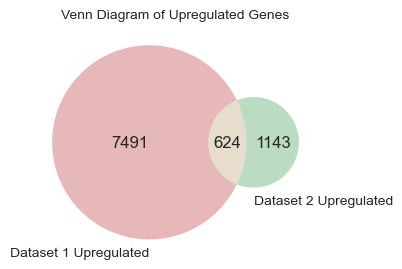

Upregulated Genes in Intersection: ENSG00000238722, ENSG00000176920, ENSG00000225131, ENSG00000260411, ENSG00000256137, ENSG00000254897, ENSG00000248878, ENSG00000253022, ENSG00000235183, ENSG00000178055, ENSG00000230403, ENSG00000199591, ENSG00000136944, ENSG00000099869, ENSG00000252532, ENSG00000206172, ENSG00000254051, ENSG00000267278, ENSG00000267575, ENSG00000253054, ENSG00000187672, ENSG00000179912, ENSG00000237963, ENSG00000267354, ENSG00000271461, ENSG00000271010, ENSG00000263644, ENSG00000252445, ENSG00000230320, ENSG00000271964, ENSG00000249255, ENSG00000251417, ENSG00000199395, ENSG00000231748, ENSG00000166363, ENSG00000257831, ENSG00000225383, ENSG00000259134, ENSG00000259904, ENSG00000271757, ENSG00000258471, ENSG00000177350, ENSG00000268746, ENSG00000241993, ENSG00000273396, ENSG00000270555, ENSG00000246016, ENSG00000253811, ENSG00000159712, ENSG00000254949, ENSG00000143633, ENSG00000269375, ENSG00000238420, ENSG00000187600, ENSG00000263311, ENSG00000185633, ENSG000002609

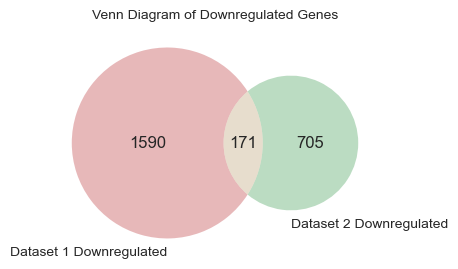

AnCg


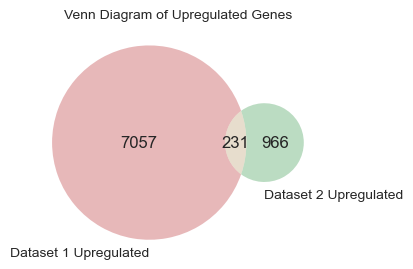

Upregulated Genes in Intersection: ENSG00000175793, ENSG00000235026, ENSG00000168748, ENSG00000110011, ENSG00000151360, ENSG00000120306, ENSG00000166228, ENSG00000230979, ENSG00000241468, ENSG00000237370, ENSG00000229356, ENSG00000186831, ENSG00000264954, ENSG00000254132, ENSG00000179799, ENSG00000251314, ENSG00000169136, ENSG00000183476, ENSG00000272862, ENSG00000225573, ENSG00000273045, ENSG00000129194, ENSG00000206341, ENSG00000234042, ENSG00000231782, ENSG00000130312, ENSG00000254981, ENSG00000180198, ENSG00000204525, ENSG00000100911, ENSG00000121060, ENSG00000174327, ENSG00000133935, ENSG00000259471, ENSG00000173626, ENSG00000121900, ENSG00000135245, ENSG00000187867, ENSG00000103510, ENSG00000230550, ENSG00000224504, ENSG00000136444, ENSG00000196533, ENSG00000224881, ENSG00000201821, ENSG00000153162, ENSG00000199472, ENSG00000056661, ENSG00000250815, ENSG00000178458, ENSG00000165887, ENSG00000258378, ENSG00000199161, ENSG00000233040, ENSG00000269290, ENSG00000173530, ENSG000002609

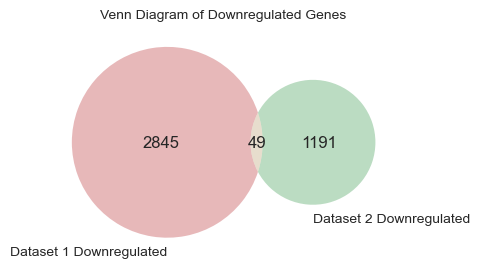

DLPFC


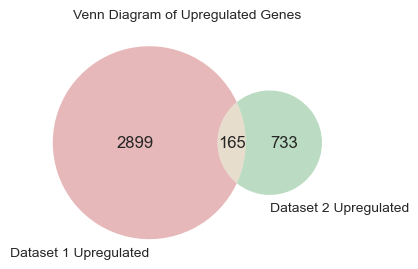

Upregulated Genes in Intersection: ENSG00000175793, ENSG00000255652, ENSG00000159337, ENSG00000250902, ENSG00000151360, ENSG00000266413, ENSG00000272797, ENSG00000221378, ENSG00000221774, ENSG00000270915, ENSG00000134874, ENSG00000264104, ENSG00000232775, ENSG00000255547, ENSG00000253125, ENSG00000261170, ENSG00000207451, ENSG00000215319, ENSG00000249820, ENSG00000249077, ENSG00000229918, ENSG00000266999, ENSG00000171855, ENSG00000250623, ENSG00000180979, ENSG00000272046, ENSG00000163982, ENSG00000021461, ENSG00000213587, ENSG00000135245, ENSG00000236550, ENSG00000259353, ENSG00000259995, ENSG00000225594, ENSG00000247287, ENSG00000238349, ENSG00000188089, ENSG00000244730, ENSG00000266513, ENSG00000254852, ENSG00000236155, ENSG00000183929, ENSG00000252017, ENSG00000237805, ENSG00000210077, ENSG00000227684, ENSG00000250535, ENSG00000270562, ENSG00000165810, ENSG00000269289, ENSG00000218631, ENSG00000204092, ENSG00000232368, ENSG00000207393, ENSG00000242756, ENSG00000225671, ENSG000002706

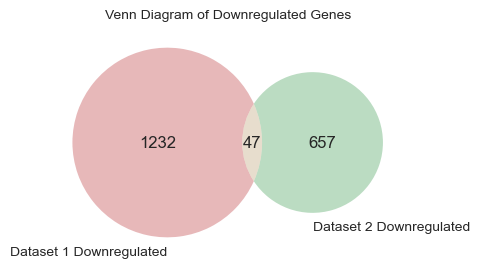

In [40]:
regions = ['nAcc', 'AnCg', 'DLPFC']
for r in regions:
    schiz_name = f'res_schiz_{r}'
    mdd_name = f'res_mdd_{r}'
    
    print(f'{r}')
    venn_diagram(up_down(globals()[schiz_name]), up_down(globals()[mdd_name]))

P value with correction for false discovery rate gives a very small group of genes that show significantly different from control expression, especially for depression. Let's try to apply different corrections

In [41]:
def apply_correction(df, method='fdr_bh'):
    df_corrected = df.copy()
    reject, pvals_corrected, _, _ = multipletests(df['pvalue'].values, alpha=0.05, method=method)
    df_corrected['padj_corrected'] = pvals_corrected
    condition_upregulated = (df_corrected['log2FoldChange'] > 0) & (df_corrected['padj_corrected'] < 0.05)
    condition_downregulated = (df_corrected['log2FoldChange'] < 0) & (df_corrected['padj_corrected'] < 0.05)
    df_corrected['Regulation'] = 0
    df_corrected.loc[condition_upregulated, 'Regulation'] = 1
    df_corrected.loc[condition_downregulated, 'Regulation'] = -1
    return df_corrected


regions = ['nAcc', 'AnCg', 'DLPFC']
methods = ['bonferroni', 'sidak', 'holm-sidak', 'holm', 'simes-hochberg', 'hommel', 'fdr_bh']
datasets = {}


for region in regions:
    for condition in ['schiz', 'mdd']:
        df_name = f'res_{condition}_{region}'
        datasets[df_name] = globals()[df_name]


results = {}
for method in methods:
    for name, df in datasets.items():
        corrected_df = apply_correction(df, method=method)
        upregulated_count = (corrected_df['Regulation'] == 1).sum()
        downregulated_count = (corrected_df['Regulation'] == -1).sum()
        results[(name, method)] = {'upregulated': upregulated_count, 'downregulated': downregulated_count}


results


{('res_schiz_nAcc', 'bonferroni'): {'upregulated': 16, 'downregulated': 0},
 ('res_mdd_nAcc', 'bonferroni'): {'upregulated': 0, 'downregulated': 0},
 ('res_schiz_AnCg', 'bonferroni'): {'upregulated': 32, 'downregulated': 1},
 ('res_mdd_AnCg', 'bonferroni'): {'upregulated': 1, 'downregulated': 0},
 ('res_schiz_DLPFC', 'bonferroni'): {'upregulated': 0, 'downregulated': 1},
 ('res_mdd_DLPFC', 'bonferroni'): {'upregulated': 0, 'downregulated': 0},
 ('res_schiz_nAcc', 'sidak'): {'upregulated': 16, 'downregulated': 0},
 ('res_mdd_nAcc', 'sidak'): {'upregulated': 0, 'downregulated': 0},
 ('res_schiz_AnCg', 'sidak'): {'upregulated': 32, 'downregulated': 1},
 ('res_mdd_AnCg', 'sidak'): {'upregulated': 1, 'downregulated': 0},
 ('res_schiz_DLPFC', 'sidak'): {'upregulated': 0, 'downregulated': 1},
 ('res_mdd_DLPFC', 'sidak'): {'upregulated': 0, 'downregulated': 0},
 ('res_schiz_nAcc', 'holm-sidak'): {'upregulated': 16, 'downregulated': 0},
 ('res_mdd_nAcc', 'holm-sidak'): {'upregulated': 0, 'downr

## PCA

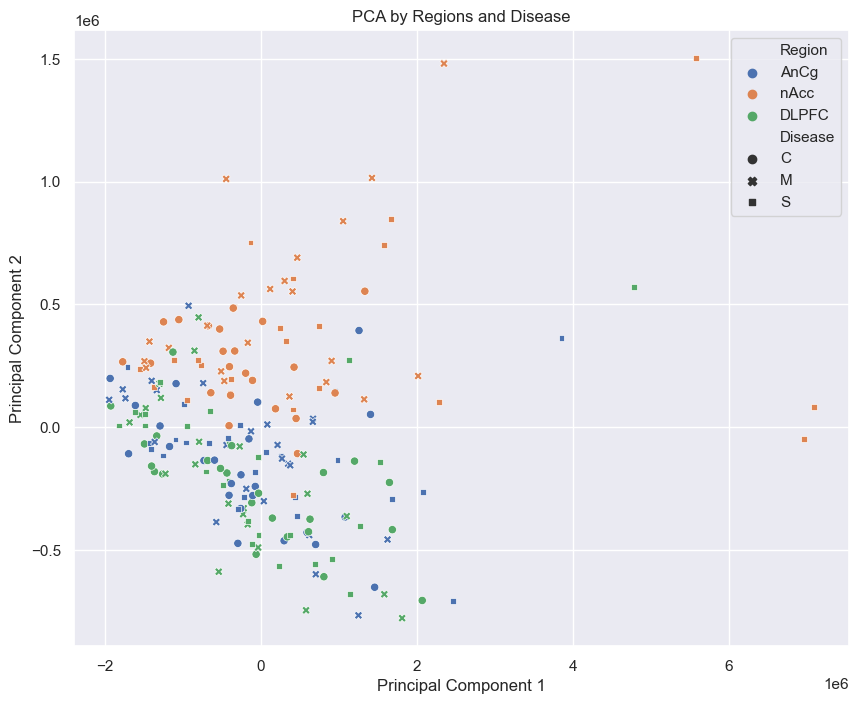

In [42]:
data_pca = data#.T

# merge expression data and samples info
merged_data = data_pca.join(samples)

# need only data about expression, 3 last columns are Patient, Region, Disease
X = merged_data.iloc[:, :-3]  

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df['Region'] = merged_data['Region'].reset_index(drop=True)
pca_df['Disease'] = merged_data['Disease'].reset_index(drop=True)


plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Region', style='Disease', data=pca_df)
plt.title('PCA by Regions and Disease')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend()
plt.show()

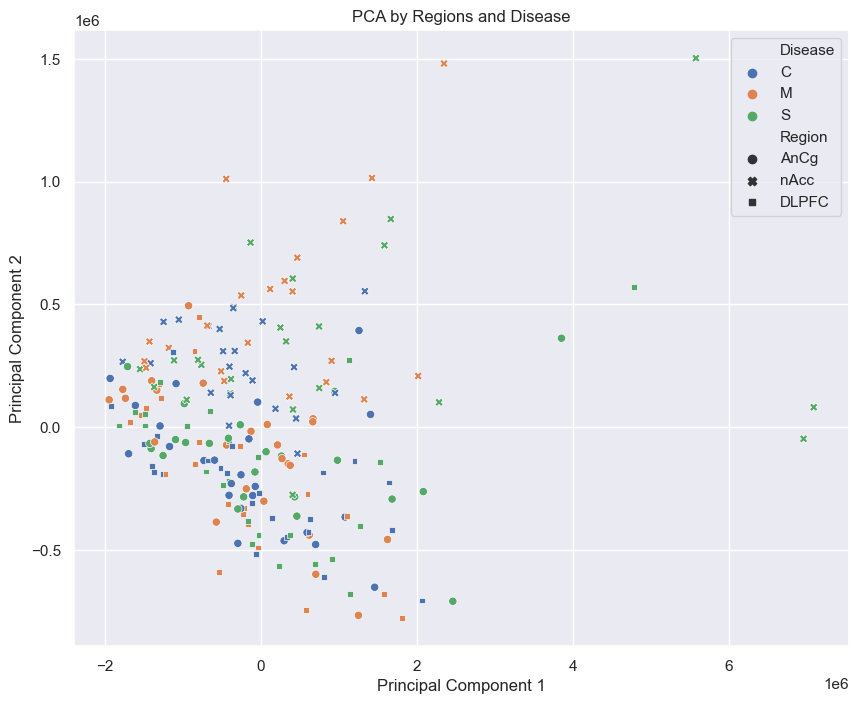

In [43]:
#just to look at

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Disease', style='Region', data=pca_df)
plt.title('PCA by Regions and Disease')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend()
plt.show()

In [44]:
dds_disease_nAcc

AnnData object with n_obs × n_vars = 67 × 51720
    obs: 'Patient', 'Region', 'Disease'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'

We will use the z-score to determine outliers (the position of an individual observation relative to the sample mean, expressed in units of standard deviation). If the z-score of a data point is greater than 2 or 3, it can be considered an outlier.

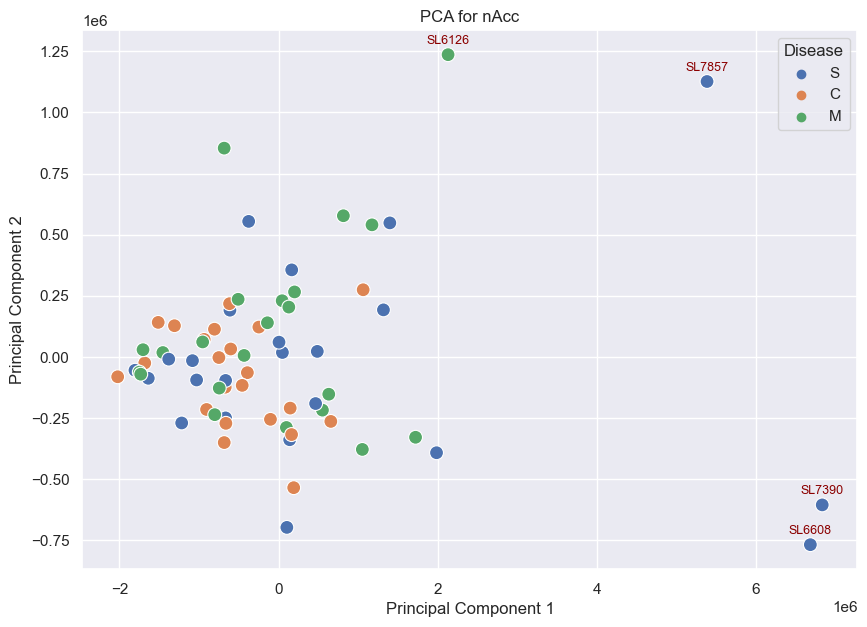

Outlier: SL6126
Outlier: SL6608
Outlier: SL7390
Outlier: SL7857


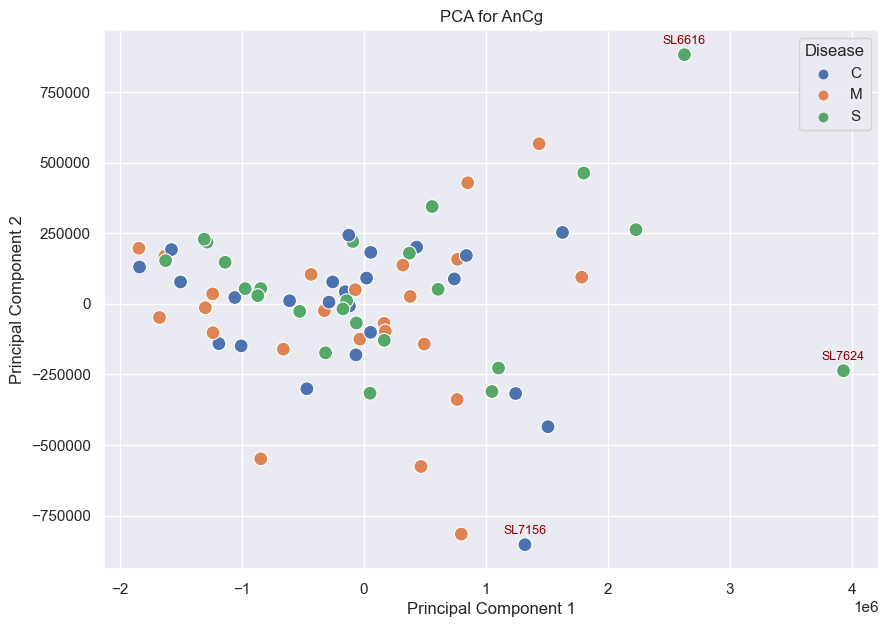

Outlier: SL6616
Outlier: SL7156
Outlier: SL7624


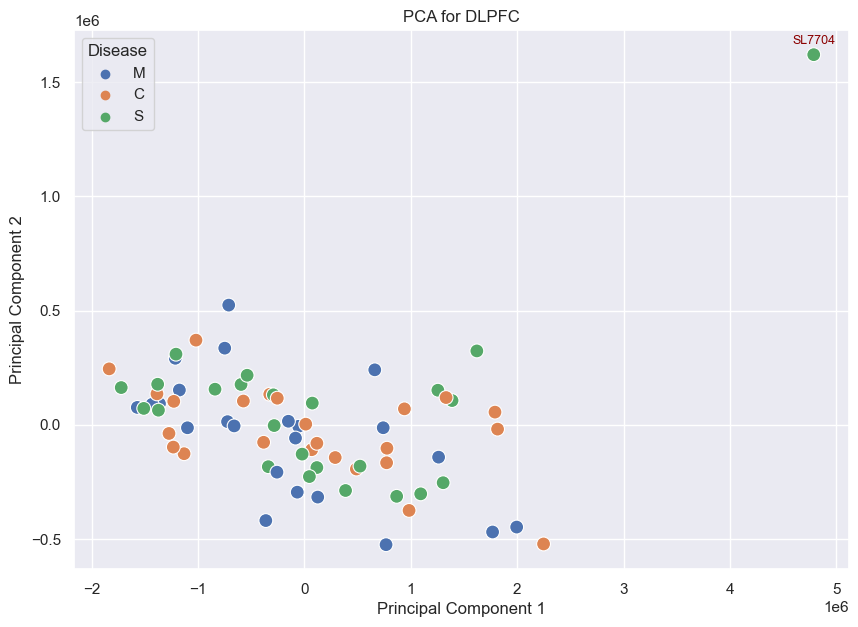

Outlier: SL7704


In [45]:
list_outliers = []
for r in regions:
   
    pca_coordinates = globals()[f'dds_disease_{r}'].obsm['X_pca']
    obs_names = globals()[f'dds_disease_{r}'].obs_names
    diseases = globals()[f'dds_disease_{r}'].obs['Disease'].values  
    
   
    z_scores = np.abs(stats.zscore(pca_coordinates[:, :2]))
    outlier_threshold = 3
    # np.any checks if any of two z scores for 2 pca coordinates are true
    outliers = np.where(np.any(z_scores > outlier_threshold, axis=1))[0]

    # create a dataset for visualization
    df = pd.DataFrame(pca_coordinates[:, :2], columns=['PC1', 'PC2'])
    df['Sample'] = obs_names
    df['Disease'] = diseases

    
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df, x='PC1', y='PC2', hue='Disease', palette='deep', legend='full', s=100)

    # annotation
    for outlier in outliers:
        plt.annotate(df.iloc[outlier]['Sample'],
                     (df.iloc[outlier]['PC1'], df.iloc[outlier]['PC2']),
                     textcoords="offset points",
                     xytext=(0,8),
                     ha='center', size=9, color = 'darkred')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA for {r}')
    plt.legend(title='Disease')
    plt.grid(True)
    plt.show()
    
    for outlier in outliers:
        list_outliers.append(df.iloc[outlier]["Sample"])
        print(f'Outlier: {df.iloc[outlier]["Sample"]}')

## Outliers


In [38]:
list_outliers

['SL6126',
 'SL6608',
 'SL7390',
 'SL7857',
 'SL6616',
 'SL7156',
 'SL7624',
 'SL7704']

In [39]:

# list_outliers = ['SL7624','SL7704', 'SL7857', 'SL6616', 'SL7390']

In [40]:
samples[samples.index.isin(list_outliers)]

,Patient,Region,Disease
Sample,,,
SL6126,X3004,nAcc,M
SL6608,X4656,nAcc,S
SL6616,X4463,AnCg,S
SL7156,X3228,AnCg,C
SL7390,X4463,nAcc,S
SL7624,X4404,AnCg,S
SL7704,X4404,DLPFC,S
SL7857,X4404,nAcc,S


In [41]:
samples[samples.index.isin(list_outliers)].groupby('Patient').agg(count = ('Region', np.count_nonzero))

,count
Patient,
X3004,1
X3228,1
X4404,3
X4463,2
X4656,1


Schizophrenia patient **X4404** and all three of his region samples are outliers. 

Patient **X4463** is also an outlier in two regions. 

Let's look into their expression level. Is it abnormal?

It would be fair to get rid of all regions samples for the both patients. So now that we know all 6 samples, let's see the results without them.

In [42]:
#if only 2 patients are outliers
#list_outliers = samples[(samples.Patient == 'X4463') | (samples.Patient == 'X4404')].index.tolist()
#list_outliers = samples[(samples.Patient == 'X4463')].index.tolist()
list_outliers = ['SL7624','SL7704', 'SL7857', 'SL6616', 'SL7390']
#list_outliers = []

In [43]:
((data.index.isin(list_outliers)-1)*-1).astype(bool)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [44]:
mean_all = data.loc[((data.index.isin(list_outliers)-1)*-1).astype(bool)].mean(axis=1)

In [45]:
mean_all

SL31501     490.036775
SL31502     520.281129
SL31504     389.027920
SL31505     636.005182
SL31506     586.709648
              ...     
SL7849      673.085480
SL7852      770.305936
SL7855      590.905259
SL7856      476.561524
SL7858     1128.756400
Length: 205, dtype: float64

In [46]:
mean_outliers = data[data.index.isin(list_outliers)].mean(axis=1)

In [47]:
mean_outliers.mean()

694.4686542923433

In [48]:
mean_all.mean()

823.7523497066758

Mean expession of outliers is smaller. Is it statistically significant?

In [49]:
stats.ttest_ind(mean_all, mean_outliers, equal_var = False)[1]

0.042690656089809216

In [50]:
df_mean = data.mean(axis=1).reset_index()
df_mean.columns = ['index', 'mean_expression']
df_mean['logExpr'] = np.log(df_mean.mean_expression)
df_mean

,index,mean_expression,logExpr
0,SL31501,490.036775,6.194480
1,SL31502,520.281129,6.254369
2,SL31504,389.027920,5.963651
3,SL31505,636.005182,6.455207
4,SL31506,586.709648,6.374530
...,...,...,...
205,SL7852,770.305936,6.646788
206,SL7855,590.905259,6.381656
207,SL7856,476.561524,6.166597
208,SL7857,721.454312,6.581269


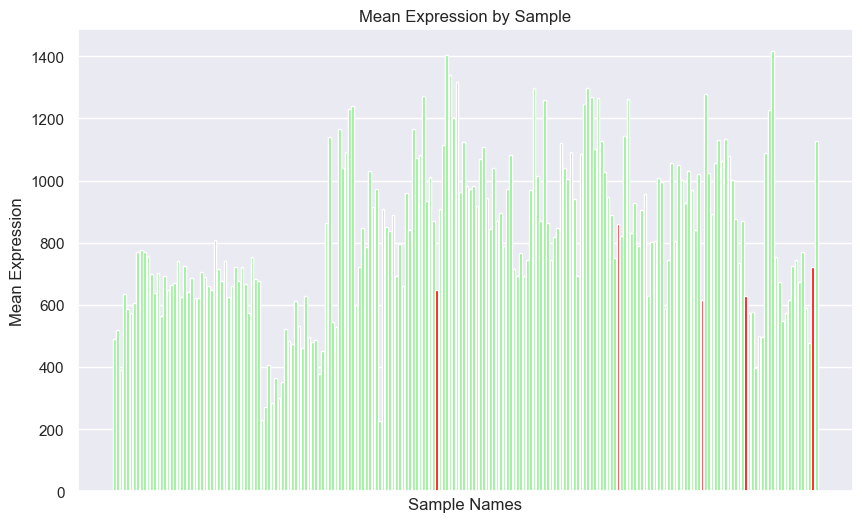

In [51]:

plt.figure(figsize=(10, 6)) 
colors = ['red' if sample in list_outliers else 'lightgreen' for sample in df_mean['index']]

plt.bar(df_mean['index'], df_mean['mean_expression'], color = colors) 
plt.xlabel('Sample Names') 
plt.ylabel('Mean Expression') 
plt.title('Mean Expression by Sample') 
plt.xticks([]) 
plt.show()

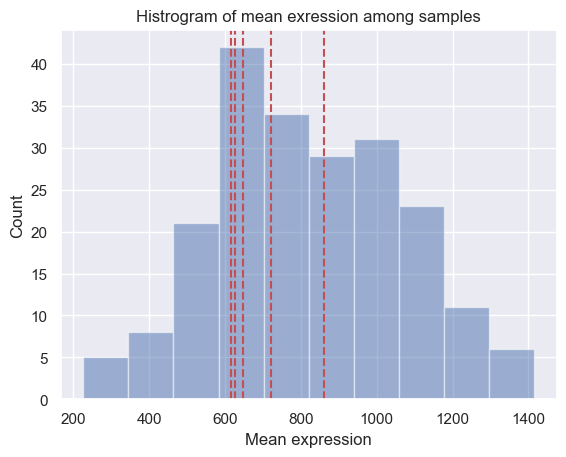

In [52]:
plt.hist(df_mean['mean_expression'], alpha=0.5);
for out in mean_outliers:
    plt.axvline(x=out, color='r', linestyle='--')
plt.xlabel('Mean expression');
plt.ylabel('Count');
plt.title('Histrogram of mean exression among samples')
plt.grid(True)

### Let's take a look on the data without outliers


In [54]:
data

gene_id,ENSG00000223972,ENSG00000227232,ENSG00000240361,ENSG00000238009,ENSG00000233750,ENSG00000237683,ENSG00000268903,ENSG00000239906,ENSG00000241860,ENSG00000241599,...,ENSG00000198886,ENSG00000210176,ENSG00000210184,ENSG00000210191,ENSG00000198786,ENSG00000198695,ENSG00000210194,ENSG00000198727,ENSG00000210195,ENSG00000210196
SL31501,0,93,0,5,5,25,4,1,9,0,...,556653,1,0,0,119564,21277,0,195813,13,186
SL31502,0,80,0,3,5,57,4,5,15,1,...,498867,1,0,0,111534,15669,0,179689,14,184
SL31504,0,50,1,6,1,5,2,3,5,0,...,695503,0,0,0,127068,18113,0,237411,19,222
SL31505,0,233,0,2,5,30,5,16,15,1,...,1290628,0,1,0,324555,47014,0,541391,43,613
SL31506,0,113,0,0,4,26,2,7,13,0,...,840452,2,0,0,242680,42762,2,448690,29,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SL7852,0,118,0,0,3,26,3,3,13,0,...,1776630,0,0,0,692357,100473,7,778192,32,1250
SL7855,2,194,0,6,18,58,10,8,13,2,...,1302298,0,0,2,659429,109760,2,398099,79,1795
SL7856,0,121,0,4,21,35,3,4,15,4,...,1321754,0,1,3,654319,113916,2,515982,112,1884
SL7857,1,83,0,12,38,15,0,1,9,1,...,3807092,4,1,6,1906405,361936,17,1525853,299,3604


In [55]:
samples_no_out = samples[~samples.index.isin(list_outliers)]
samples_no_out

,Patient,Region,Disease
Sample,,,
SL31501,X1834,AnCg,C
SL31502,X2315,AnCg,M
SL31504,X3031,AnCg,M
SL31505,X2353,nAcc,S
SL31506,X2664,nAcc,C
...,...,...,...
SL7849,X3588,nAcc,C
SL7852,X3982,nAcc,M
SL7855,X4296,nAcc,S


In [56]:
data_no_out = data[data.index.isin(samples_no_out.index)]
data_no_out

gene_id,ENSG00000223972,ENSG00000227232,ENSG00000240361,ENSG00000238009,ENSG00000233750,ENSG00000237683,ENSG00000268903,ENSG00000239906,ENSG00000241860,ENSG00000241599,...,ENSG00000198886,ENSG00000210176,ENSG00000210184,ENSG00000210191,ENSG00000198786,ENSG00000198695,ENSG00000210194,ENSG00000198727,ENSG00000210195,ENSG00000210196
SL31501,0,93,0,5,5,25,4,1,9,0,...,556653,1,0,0,119564,21277,0,195813,13,186
SL31502,0,80,0,3,5,57,4,5,15,1,...,498867,1,0,0,111534,15669,0,179689,14,184
SL31504,0,50,1,6,1,5,2,3,5,0,...,695503,0,0,0,127068,18113,0,237411,19,222
SL31505,0,233,0,2,5,30,5,16,15,1,...,1290628,0,1,0,324555,47014,0,541391,43,613
SL31506,0,113,0,0,4,26,2,7,13,0,...,840452,2,0,0,242680,42762,2,448690,29,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SL7849,1,147,1,4,4,23,1,1,12,0,...,1171541,1,0,3,470531,85489,2,547146,132,1332
SL7852,0,118,0,0,3,26,3,3,13,0,...,1776630,0,0,0,692357,100473,7,778192,32,1250
SL7855,2,194,0,6,18,58,10,8,13,2,...,1302298,0,0,2,659429,109760,2,398099,79,1795
SL7856,0,121,0,4,21,35,3,4,15,4,...,1321754,0,1,3,654319,113916,2,515982,112,1884


In [57]:
# Division of samples dataset by "Region"

#'nAcc', 'AnCg', 'DLPFC'
 
datasets_no_out = []


for r in regions:
    globals()[f'data_no_out_{r}'] = samples_no_out[samples_no_out['Region'] == r]
    globals()[f'data_no_out_{r}'].sort_index(inplace = True)
    datasets_no_out.append(f'data_no_out_{r}')
data_no_out_nAcc

,Patient,Region,Disease
Sample,,,
SL31505,X2353,nAcc,S
SL31506,X2664,nAcc,C
SL31507,X2805,nAcc,C
SL31508,X2976,nAcc,S
SL32251,X3018,nAcc,C
...,...,...,...
SL7849,X3588,nAcc,C
SL7852,X3982,nAcc,M
SL7855,X4296,nAcc,S


In [58]:
datasets_no_out

['data_no_out_nAcc', 'data_no_out_AnCg', 'data_no_out_DLPFC']

In [59]:
#Division of expression data by regions

expr_datasets_no_out = []

for d in datasets_no_out:
    current_dataset = globals()[d]  
    globals()[f'expr_{d}'] = data_no_out[data_no_out.index.isin(current_dataset.index)]
    expr_datasets_no_out.append(f'expr_{d}')

expr_data_no_out_nAcc

gene_id,ENSG00000223972,ENSG00000227232,ENSG00000240361,ENSG00000238009,ENSG00000233750,ENSG00000237683,ENSG00000268903,ENSG00000239906,ENSG00000241860,ENSG00000241599,...,ENSG00000198886,ENSG00000210176,ENSG00000210184,ENSG00000210191,ENSG00000198786,ENSG00000198695,ENSG00000210194,ENSG00000198727,ENSG00000210195,ENSG00000210196
SL31505,0,233,0,2,5,30,5,16,15,1,...,1290628,0,1,0,324555,47014,0,541391,43,613
SL31506,0,113,0,0,4,26,2,7,13,0,...,840452,2,0,0,242680,42762,2,448690,29,362
SL31507,0,119,0,2,9,43,1,4,12,0,...,1004983,0,0,1,372854,69277,1,528267,24,634
SL31508,0,146,0,3,5,37,2,2,9,0,...,1073688,0,1,1,287422,42661,0,494724,38,549
SL32251,0,139,0,3,5,32,2,2,5,0,...,1080557,1,0,0,340797,56441,0,513937,36,747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SL7849,1,147,1,4,4,23,1,1,12,0,...,1171541,1,0,3,470531,85489,2,547146,132,1332
SL7852,0,118,0,0,3,26,3,3,13,0,...,1776630,0,0,0,692357,100473,7,778192,32,1250
SL7855,2,194,0,6,18,58,10,8,13,2,...,1302298,0,0,2,659429,109760,2,398099,79,1795
SL7856,0,121,0,4,21,35,3,4,15,4,...,1321754,0,1,3,654319,113916,2,515982,112,1884


In [60]:
#nAcc
res_schiz_nAcc_no_out, res_mdd_nAcc_no_out, res_btw_nAcc_no_out, dds_disease_nAcc_no_out = deseq(expr_data_no_out_nAcc, data_no_out_nAcc,'Disease', 'S', 'M', 'C')

Fitting size factors...
... done in 0.13 seconds.

Fitting dispersions...
... done in 41.44 seconds.

Fitting dispersion trend curve...
... done in 24.34 seconds.

Fitting MAP dispersions...
... done in 51.45 seconds.

Fitting LFCs...
... done in 23.50 seconds.

Refitting 229 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.32 seconds.

Fitting MAP dispersions...
... done in 0.33 seconds.

Fitting LFCs...
... done in 0.23 seconds.

Running Wald tests...
... done in 6.94 seconds.



Log2 fold change & Wald test p-value: Disease S vs C


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000223972,0.400514,-0.143253,0.764014,-0.187501,0.851268,0.999772
ENSG00000227232,167.286639,0.297853,0.146381,2.034771,0.041874,0.499106
ENSG00000240361,0.404240,0.009845,1.370947,0.007181,0.994270,0.999772
ENSG00000238009,3.549360,0.135262,0.326756,0.413955,0.678907,0.999772
ENSG00000233750,8.831507,0.540040,0.323729,1.668182,0.095280,0.640440
...,...,...,...,...,...,...
ENSG00000198695,82989.239081,0.362946,0.170653,2.126807,0.033436,0.470299
ENSG00000210194,1.914554,0.263245,0.533429,0.493495,0.621663,0.999772
ENSG00000198727,621235.769745,0.221475,0.148231,1.494117,0.135145,0.715389


Running Wald tests...
... done in 6.79 seconds.



Log2 fold change & Wald test p-value: Disease M vs C


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000223972,0.400514,-0.743371,0.822367,-0.903941,0.366026,0.999636
ENSG00000227232,167.286639,0.044076,0.145078,0.303809,0.761273,0.999636
ENSG00000240361,0.404240,1.607359,1.266561,1.269074,0.204415,0.999636
ENSG00000238009,3.549360,0.627329,0.311570,2.013444,0.044068,0.999636
ENSG00000233750,8.831507,0.693448,0.318989,2.173889,0.029713,0.999636
...,...,...,...,...,...,...
ENSG00000198695,82989.239081,0.264264,0.168657,1.566873,0.117144,0.999636
ENSG00000210194,1.914554,1.056833,0.505655,2.090027,0.036615,0.999636
ENSG00000198727,621235.769745,0.400040,0.146497,2.730702,0.006320,0.999636


Running Wald tests...
... done in 6.33 seconds.



Log2 fold change & Wald test p-value: Disease S vs M


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000223972,0.400514,0.600118,0.841031,0.713550,0.475505,0.999986
ENSG00000227232,167.286639,0.253777,0.146286,1.734800,0.082776,0.769353
ENSG00000240361,0.404240,-1.597514,1.281319,-1.246773,0.212481,0.950157
ENSG00000238009,3.549360,-0.492067,0.310986,-1.582279,0.113586,0.828818
ENSG00000233750,8.831507,-0.153408,0.315182,-0.486729,0.626450,0.999986
...,...,...,...,...,...,...
ENSG00000198695,82989.239081,0.098681,0.170652,0.578260,0.563088,0.999986
ENSG00000210194,1.914554,-0.793588,0.500559,-1.585404,0.112875,0.828000
ENSG00000198727,621235.769745,-0.178566,0.148231,-1.204646,0.228340,0.963553


In [61]:
#AnCg
res_schiz_AnCg_no_out, res_mdd_AnCg_no_out, res_btw_AnCg_no_out, dds_disease_AnCg_no_out = deseq(expr_data_no_out_AnCg, data_no_out_AnCg,'Disease', 'S', 'M', 'C')

Fitting size factors...
... done in 0.20 seconds.

Fitting dispersions...
... done in 49.54 seconds.

Fitting dispersion trend curve...
... done in 24.81 seconds.

Fitting MAP dispersions...
... done in 39.44 seconds.

Fitting LFCs...
... done in 19.28 seconds.

Refitting 216 outliers.

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.36 seconds.

Fitting MAP dispersions...
... done in 0.32 seconds.

Fitting LFCs...
... done in 0.36 seconds.

Running Wald tests...
... done in 7.28 seconds.



Log2 fold change & Wald test p-value: Disease S vs C


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000223972,0.309532,-0.140638,0.937750,-0.149974,0.880786,NaN
ENSG00000227232,171.248241,0.483985,0.159132,3.041407,0.002355,0.078581
ENSG00000240361,0.254677,-0.051784,1.426164,-0.036310,0.971035,NaN
ENSG00000238009,3.821690,-0.017018,0.264240,-0.064405,0.948648,NaN
ENSG00000233750,6.554050,0.670580,0.268527,2.497251,0.012516,0.145601
...,...,...,...,...,...,...
ENSG00000198695,63513.904373,0.486735,0.160377,3.034942,0.002406,0.078917
ENSG00000210194,0.656464,0.124112,0.574935,0.215871,0.829088,NaN
ENSG00000198727,409035.443747,0.145730,0.153420,0.949875,0.342176,0.619992


Running Wald tests...
... done in 6.79 seconds.



Log2 fold change & Wald test p-value: Disease M vs C


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000223972,0.309532,-0.032557,0.910702,-0.035749,0.971482,0.998898
ENSG00000227232,171.248241,0.064073,0.156195,0.410211,0.681651,0.998898
ENSG00000240361,0.254677,1.182240,1.314216,0.899578,0.368345,0.998898
ENSG00000238009,3.821690,0.080080,0.256838,0.311793,0.755198,0.998898
ENSG00000233750,6.554050,-0.048457,0.276041,-0.175543,0.860653,0.998898
...,...,...,...,...,...,...
ENSG00000198695,63513.904373,0.175121,0.156853,1.116467,0.264222,0.998898
ENSG00000210194,0.656464,-0.273008,0.595085,-0.458772,0.646398,0.998898
ENSG00000198727,409035.443747,0.200967,0.150048,1.339356,0.180455,0.998898


Running Wald tests...
... done in 6.83 seconds.



Log2 fold change & Wald test p-value: Disease S vs M


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000223972,0.309532,-0.108081,0.959153,-0.112684,0.910281,NaN
ENSG00000227232,171.248241,0.419912,0.159323,2.635602,0.008399,0.064935
ENSG00000240361,0.254677,-1.234024,1.367875,-0.902147,0.366979,NaN
ENSG00000238009,3.821690,-0.097099,0.268082,-0.362197,0.717205,NaN
ENSG00000233750,6.554050,0.719037,0.273825,2.625896,0.008642,0.066024
...,...,...,...,...,...,...
ENSG00000198695,63513.904373,0.311614,0.160377,1.943006,0.052015,0.175300
ENSG00000210194,0.656464,0.397120,0.609702,0.651335,0.514831,NaN
ENSG00000198727,409035.443747,-0.055237,0.153420,-0.360040,0.718817,0.829790


In [62]:
#DLPFC
res_schiz_DLPFC_no_out, res_mdd_DLPFC_no_out, res_btw_DLPFC_no_out, dds_disease_DLPFC_no_out = deseq(expr_data_no_out_DLPFC, data_no_out_DLPFC,'Disease', 'S', 'M', 'C')

Fitting size factors...
... done in 0.12 seconds.

Fitting dispersions...
... done in 32.43 seconds.

Fitting dispersion trend curve...
... done in 21.26 seconds.

Fitting MAP dispersions...
... done in 39.70 seconds.

Fitting LFCs...
... done in 18.69 seconds.

Refitting 285 outliers.

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 0.30 seconds.

Fitting LFCs...
... done in 0.19 seconds.

Running Wald tests...
... done in 5.61 seconds.



Log2 fold change & Wald test p-value: Disease S vs C


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000223972,0.308764,-0.402450,0.992227,-0.405603,0.685034,0.999217
ENSG00000227232,183.694195,0.177339,0.162797,1.089326,0.276010,0.999217
ENSG00000240361,0.207991,-0.282293,1.472622,-0.191694,0.847982,0.999217
ENSG00000238009,3.852149,-0.014726,0.287554,-0.051211,0.959157,0.999217
ENSG00000233750,6.597822,-0.102507,0.226116,-0.453339,0.650305,0.999217
...,...,...,...,...,...,...
ENSG00000198695,62668.656990,0.157655,0.166124,0.949019,0.342611,0.999217
ENSG00000210194,0.664168,-0.211321,0.571304,-0.369893,0.711462,0.999217
ENSG00000198727,421825.025958,-0.145308,0.136458,-1.064850,0.286944,0.999217


Running Wald tests...
... done in 5.98 seconds.



Log2 fold change & Wald test p-value: Disease M vs C


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000223972,0.308764,-0.266457,0.981351,-0.271520,0.785991,0.999974
ENSG00000227232,183.694195,0.011199,0.162995,0.068710,0.945220,0.999974
ENSG00000240361,0.207991,1.079374,1.377667,0.783480,0.433345,0.999974
ENSG00000238009,3.852149,0.070958,0.285785,0.248291,0.803909,0.999974
ENSG00000233750,6.597822,-0.274956,0.230137,-1.194749,0.232185,0.999974
...,...,...,...,...,...,...
ENSG00000198695,62668.656990,-0.125897,0.166125,-0.757844,0.448544,0.999974
ENSG00000210194,0.664168,-0.501744,0.595893,-0.842004,0.399786,0.999974
ENSG00000198727,421825.025958,-0.097249,0.136458,-0.712662,0.476055,0.999974


Running Wald tests...
... done in 6.45 seconds.



Log2 fold change & Wald test p-value: Disease S vs M


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000223972,0.308764,-0.135993,1.022093,-0.133054,0.894151,NaN
ENSG00000227232,183.694195,0.166139,0.164448,1.010284,0.312359,0.674187
ENSG00000240361,0.207991,-1.361667,1.416843,-0.961057,0.336523,NaN
ENSG00000238009,3.852149,-0.085684,0.288094,-0.297416,0.766149,NaN
ENSG00000233750,6.597822,0.172449,0.233488,0.738577,0.460164,NaN
...,...,...,...,...,...,...
ENSG00000198695,62668.656990,0.283552,0.167883,1.688991,0.091221,0.437555
ENSG00000210194,0.664168,0.290423,0.612861,0.473880,0.635585,NaN
ENSG00000198727,421825.025958,-0.048059,0.137902,-0.348500,0.727465,0.902458


nAcc


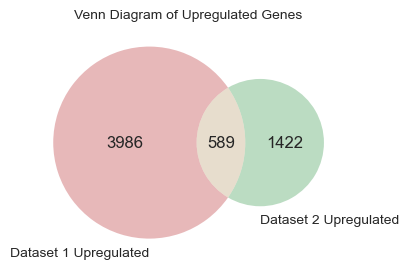

Upregulated Genes in Intersection: ENSG00000272862, ENSG00000243370, ENSG00000255284, ENSG00000272568, ENSG00000269069, ENSG00000255156, ENSG00000257097, ENSG00000206989, ENSG00000232116, ENSG00000168967, ENSG00000163357, ENSG00000199804, ENSG00000253208, ENSG00000248378, ENSG00000272703, ENSG00000237963, ENSG00000054654, ENSG00000272346, ENSG00000227309, ENSG00000251993, ENSG00000263415, ENSG00000254893, ENSG00000130528, ENSG00000238117, ENSG00000238583, ENSG00000252764, ENSG00000248923, ENSG00000272175, ENSG00000267668, ENSG00000224198, ENSG00000270906, ENSG00000229154, ENSG00000224255, ENSG00000265642, ENSG00000225399, ENSG00000182912, ENSG00000230391, ENSG00000183535, ENSG00000237654, ENSG00000168274, ENSG00000234913, ENSG00000241316, ENSG00000253678, ENSG00000183134, ENSG00000263766, ENSG00000204717, ENSG00000204556, ENSG00000249255, ENSG00000231725, ENSG00000200823, ENSG00000256315, ENSG00000262319, ENSG00000250290, ENSG00000238287, ENSG00000270423, ENSG00000196912, ENSG000002547

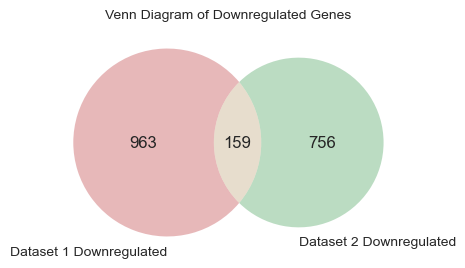

AnCg


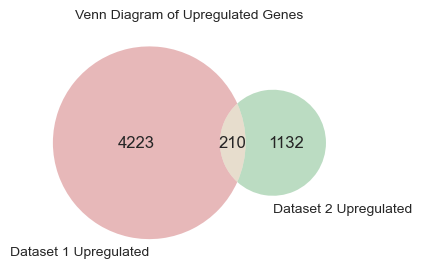

Upregulated Genes in Intersection: ENSG00000272862, ENSG00000250815, ENSG00000166002, ENSG00000203576, ENSG00000240230, ENSG00000145623, ENSG00000174327, ENSG00000144671, ENSG00000214144, ENSG00000092010, ENSG00000264608, ENSG00000233828, ENSG00000205583, ENSG00000148450, ENSG00000090238, ENSG00000254703, ENSG00000149131, ENSG00000231970, ENSG00000112378, ENSG00000234042, ENSG00000231035, ENSG00000120306, ENSG00000186162, ENSG00000214922, ENSG00000015475, ENSG00000231359, ENSG00000110011, ENSG00000186567, ENSG00000169136, ENSG00000261613, ENSG00000105610, ENSG00000187922, ENSG00000121851, ENSG00000130312, ENSG00000265160, ENSG00000175826, ENSG00000235820, ENSG00000253618, ENSG00000174990, ENSG00000214160, ENSG00000183476, ENSG00000220563, ENSG00000175793, ENSG00000206341, ENSG00000231193, ENSG00000115255, ENSG00000116096, ENSG00000197165, ENSG00000254805, ENSG00000063241, ENSG00000102265, ENSG00000215217, ENSG00000262681, ENSG00000263641, ENSG00000185187, ENSG00000138772, ENSG000002350

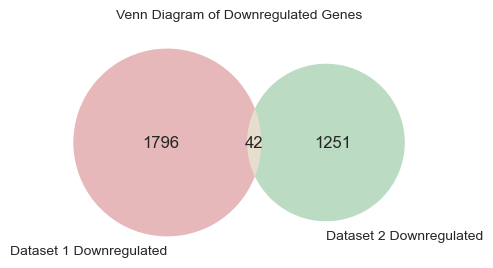

DLPFC


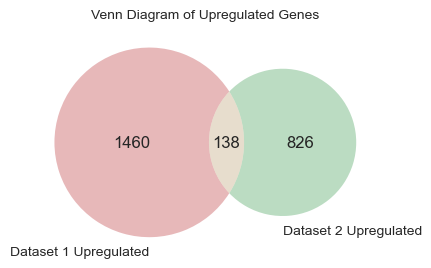

Upregulated Genes in Intersection: ENSG00000102287, ENSG00000163982, ENSG00000204788, ENSG00000134874, ENSG00000238246, ENSG00000224905, ENSG00000237805, ENSG00000225594, ENSG00000248978, ENSG00000249743, ENSG00000218631, ENSG00000253125, ENSG00000123892, ENSG00000212413, ENSG00000236411, ENSG00000213587, ENSG00000137558, ENSG00000125999, ENSG00000185201, ENSG00000199783, ENSG00000159337, ENSG00000221386, ENSG00000058668, ENSG00000207491, ENSG00000021461, ENSG00000255545, ENSG00000127954, ENSG00000236155, ENSG00000169550, ENSG00000272046, ENSG00000242727, ENSG00000239405, ENSG00000250623, ENSG00000171631, ENSG00000272377, ENSG00000236550, ENSG00000207393, ENSG00000164385, ENSG00000223542, ENSG00000241218, ENSG00000230371, ENSG00000272797, ENSG00000249820, ENSG00000250866, ENSG00000241228, ENSG00000269236, ENSG00000232675, ENSG00000172554, ENSG00000173421, ENSG00000139239, ENSG00000101624, ENSG00000269945, ENSG00000249396, ENSG00000060138, ENSG00000235628, ENSG00000266983, ENSG000002340

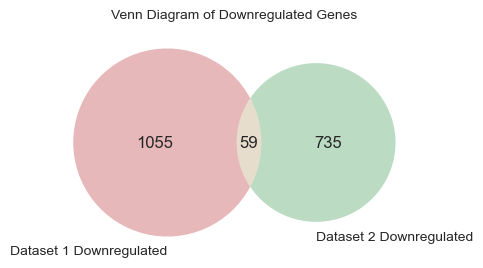

In [63]:
regions = ['nAcc', 'AnCg', 'DLPFC']
for r in regions:
    schiz_name = f'res_schiz_{r}_no_out'
    mdd_name = f'res_mdd_{r}_no_out'
    
    print(f'{r}')
    venn_diagram(up_down(globals()[schiz_name]), up_down(globals()[mdd_name]))

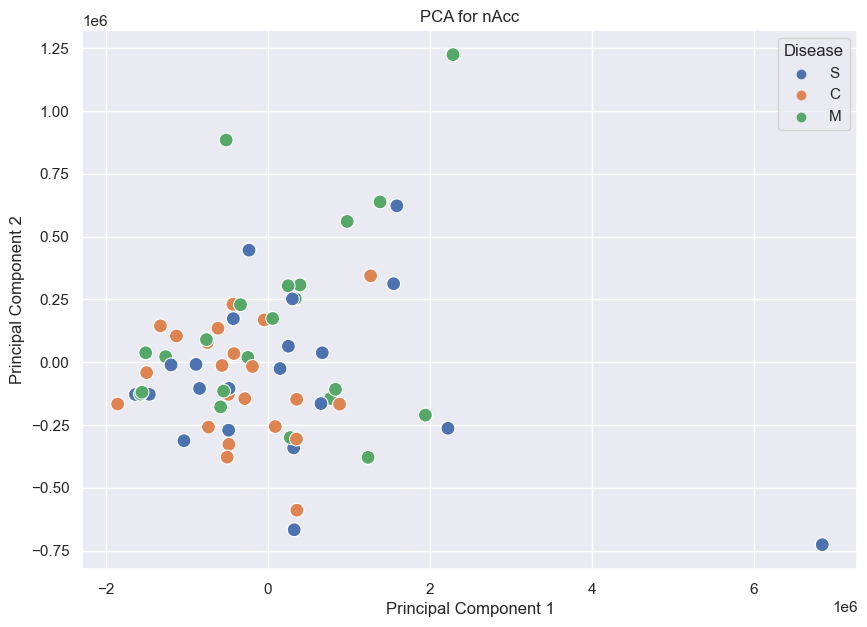

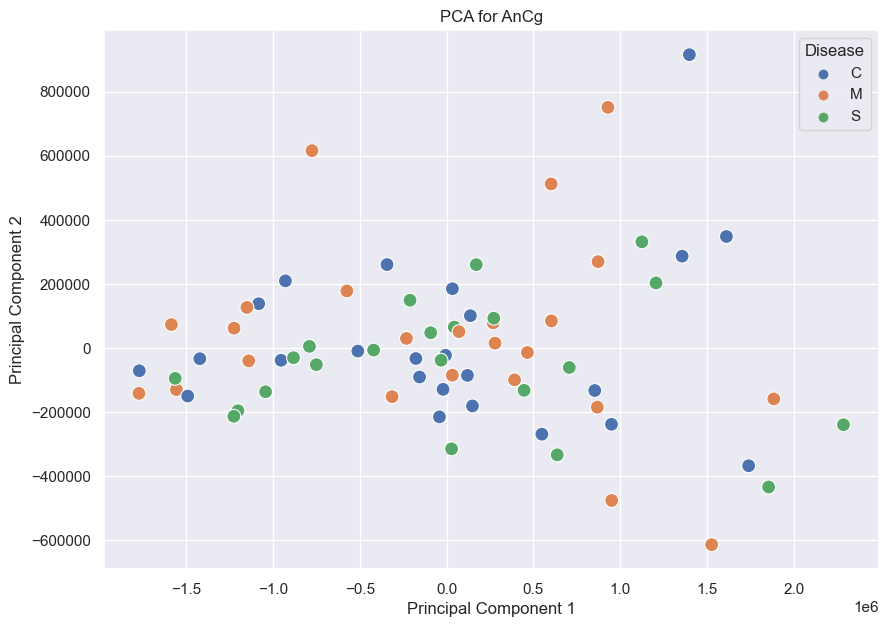

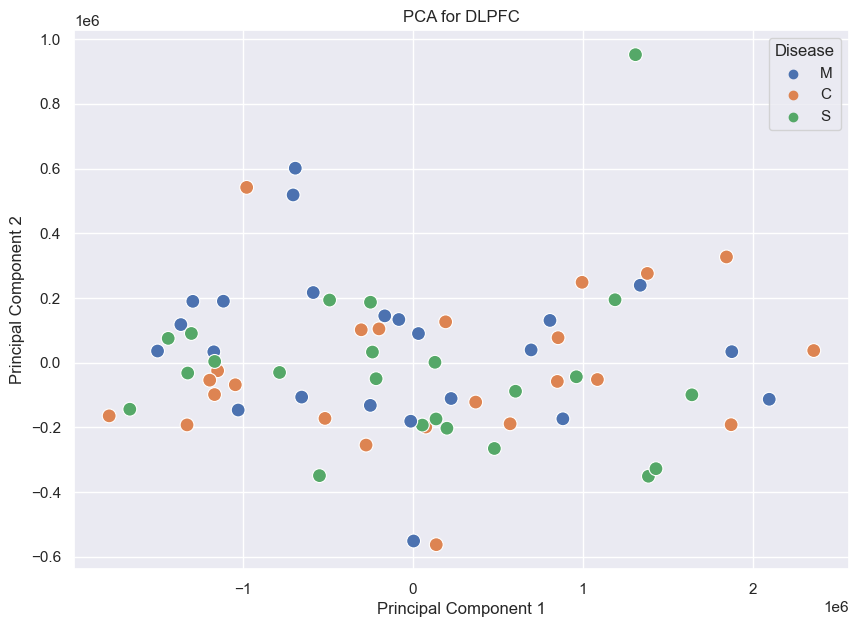

In [64]:
for r in regions:
   
    pca_coordinates = globals()[f'dds_disease_{r}_no_out'].obsm['X_pca']
    obs_names = globals()[f'dds_disease_{r}_no_out'].obs_names
    diseases = globals()[f'dds_disease_{r}_no_out'].obs['Disease'].values  # Получение данных о болезнях


    # create a dataset for visualization
    df = pd.DataFrame(pca_coordinates[:, :2], columns=['PC1', 'PC2'])
    df['Sample'] = obs_names
    df['Disease'] = diseases

    
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df, x='PC1', y='PC2', hue='Disease', palette='deep', legend='full', s=100)

    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA for {r}')
    plt.legend(title='Disease')
    plt.grid(True)
    plt.show()


## Volcano plot


In [68]:
def plot_volcano(datasets):
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 5))  

 
    for i, (dataset_name, dataset) in enumerate(datasets.items(), 1):
        plt.subplot(1, 3, i)
        
        sns.scatterplot(x='log2FoldChange', y=-1 * (dataset['padj'].apply(lambda x: np.log10(x))),
                        data=dataset, alpha=0.7)
        plt.axhline(-np.log10(0.05), color='gray', linestyle='--', label='P-value = 0.05')

        
        plt.xlabel('log2FoldChange')
        plt.ylabel('-log10(pvalue)')
        plt.title(f'Volcano Plot for {dataset_name}')


    plt.tight_layout()
    

    plt.show()



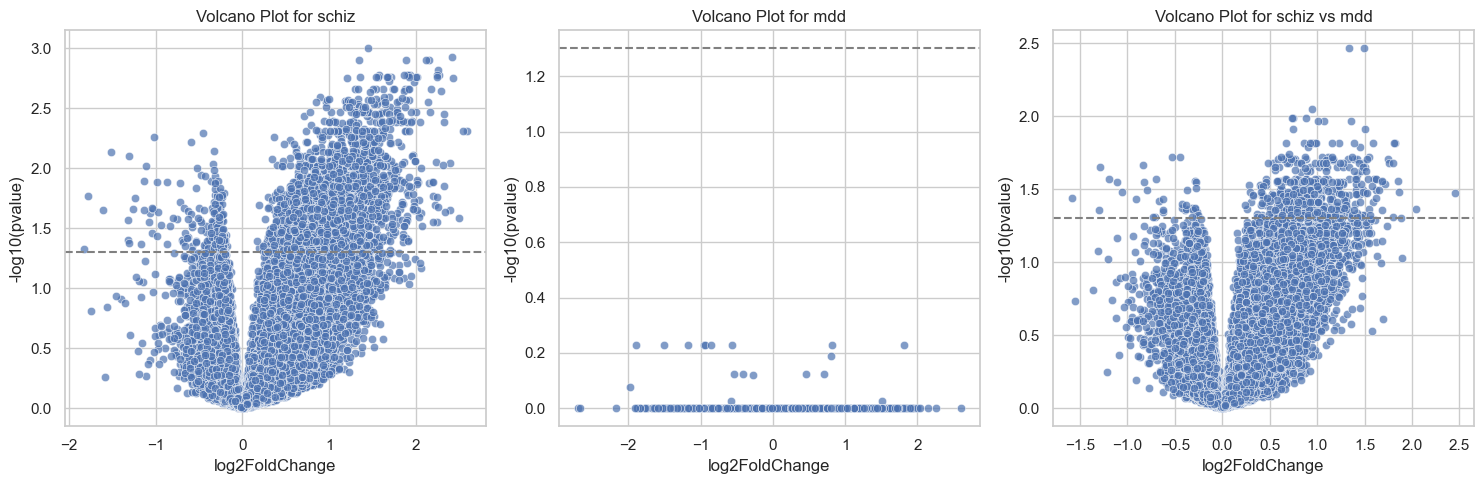

In [69]:
## nAcc

datasets = {'schiz': res_schiz_nAcc,
            'mdd': res_mdd_nAcc,
            'schiz vs mdd': res_btw_nAcc}

plot_volcano(datasets)

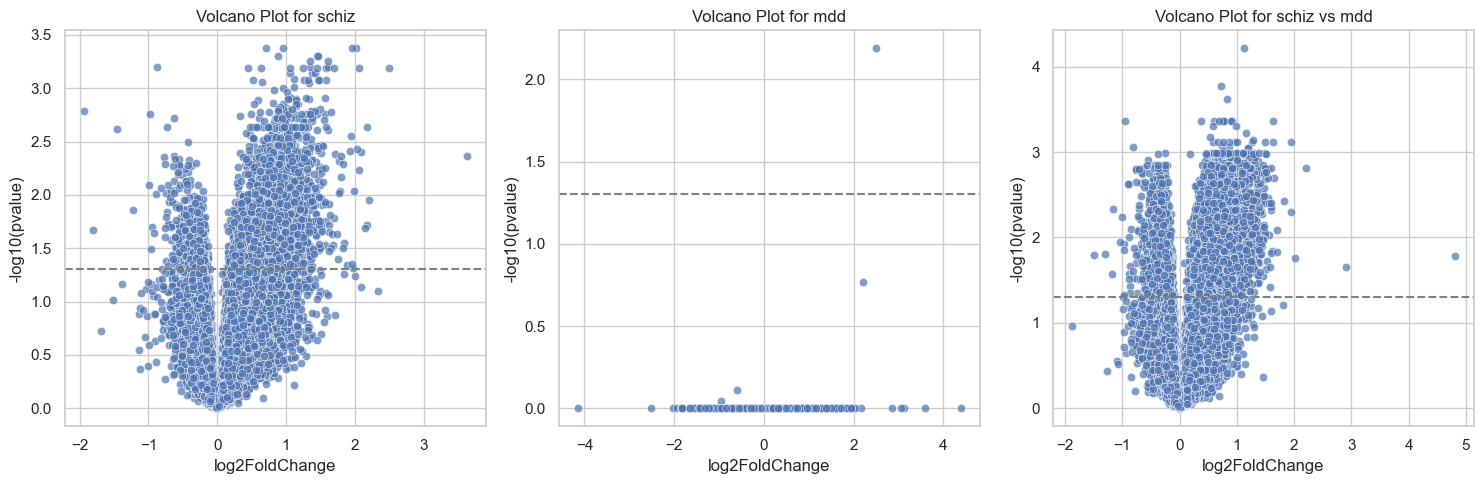

In [70]:
## AnCg

datasets = {'schiz': res_schiz_AnCg,
            'mdd': res_mdd_AnCg,
            'schiz vs mdd': res_btw_AnCg}

plot_volcano(datasets)

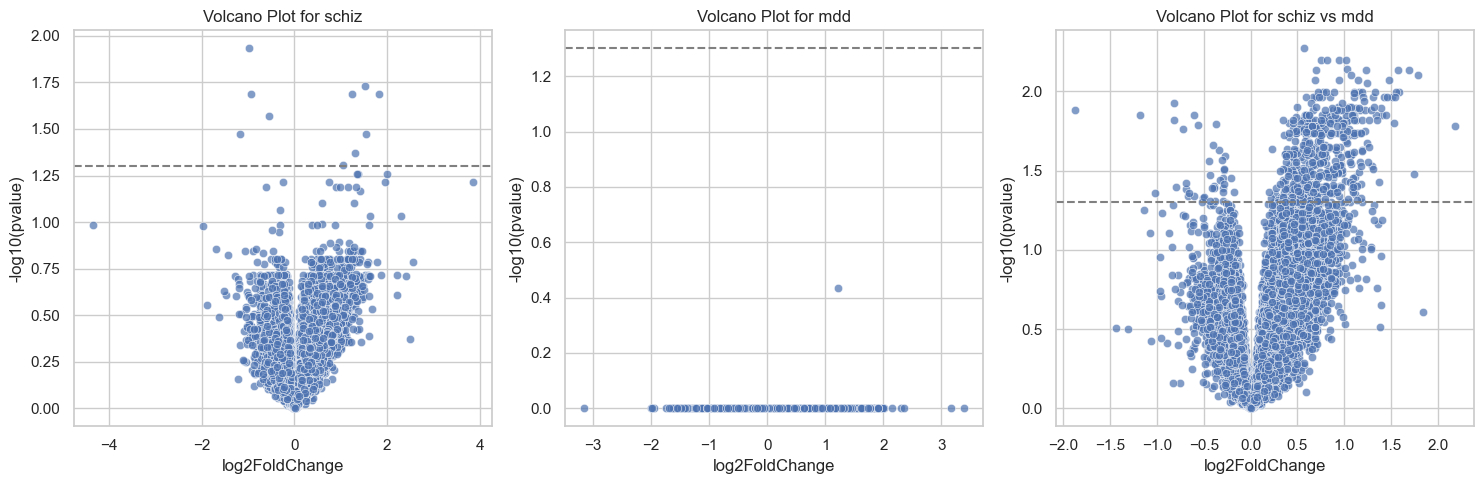

In [71]:
#DLPFC

datasets = {'schiz': res_schiz_DLPFC,
            'mdd': res_mdd_DLPFC,
            'schiz vs mdd': res_btw_DLPFC}

plot_volcano(datasets)

## FoldChangeGraph

In [74]:
def plot_fold_change(df_schiz, df_mdd, label_schiz, label_mdd):
    df_schiz['fold_change'] = 2**df_schiz['log2FoldChange']
    df_mdd['fold_change'] = 2**df_mdd['log2FoldChange']
    significant_genes = (up_down(df_schiz).query('Regulation != 0').index).union(up_down(df_mdd).query('Regulation != 0').index)

    merged_df = pd.merge(df_schiz, df_mdd, left_index=True, right_index=True, suffixes=['_schiz', '_mdd'])

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='log2FoldChange_schiz', y='log2FoldChange_mdd', data=merged_df, color='pink', alpha=0.5)

    # Highlight significant genes
    significant_data = merged_df.loc[merged_df.index.isin(significant_genes)]
    sns.scatterplot(x='log2FoldChange_schiz', y='log2FoldChange_mdd', data=significant_data, color='purple', edgecolor='black', linewidth=1, s=40, label='Significant Genes')

    # Diagonal line
    max_change = max(df_schiz['log2FoldChange'].max(), df_mdd['log2FoldChange'].max())
    plt.plot([-2, max_change], [-2, max_change], linestyle='--', color='gray', linewidth=1)
    
    # Linear regression approximation
    reg_result = linregress(df_schiz['log2FoldChange'], df_mdd['log2FoldChange'])
    sns.regplot(x='log2FoldChange_schiz', y='log2FoldChange_mdd', data=merged_df, scatter=False, ci=None, color='gray', line_kws={'linewidth': 1})

    plt.xlabel(f'2log Fold Change {label_schiz}')
    plt.ylabel(f'2log Fold Change {label_mdd}')
    plt.title(f'2log Fold Change Comparison: {label_schiz} vs {label_mdd}')

    correlation_coefficient, _ = pearsonr(df_schiz['log2FoldChange'], df_mdd['log2FoldChange'])
    print(f'Correlation Coefficient: {correlation_coefficient}')
    print(f'Slope (Угол наклона): {reg_result.slope}')
    print(f'Intercept: {reg_result.intercept}')
    
    plt.legend()
    plt.tight_layout()
    plt.show()



Correlation Coefficient: 0.49978404010702127
Slope (Угол наклона): 0.40291155211346336
Intercept: -0.0007578753424012236


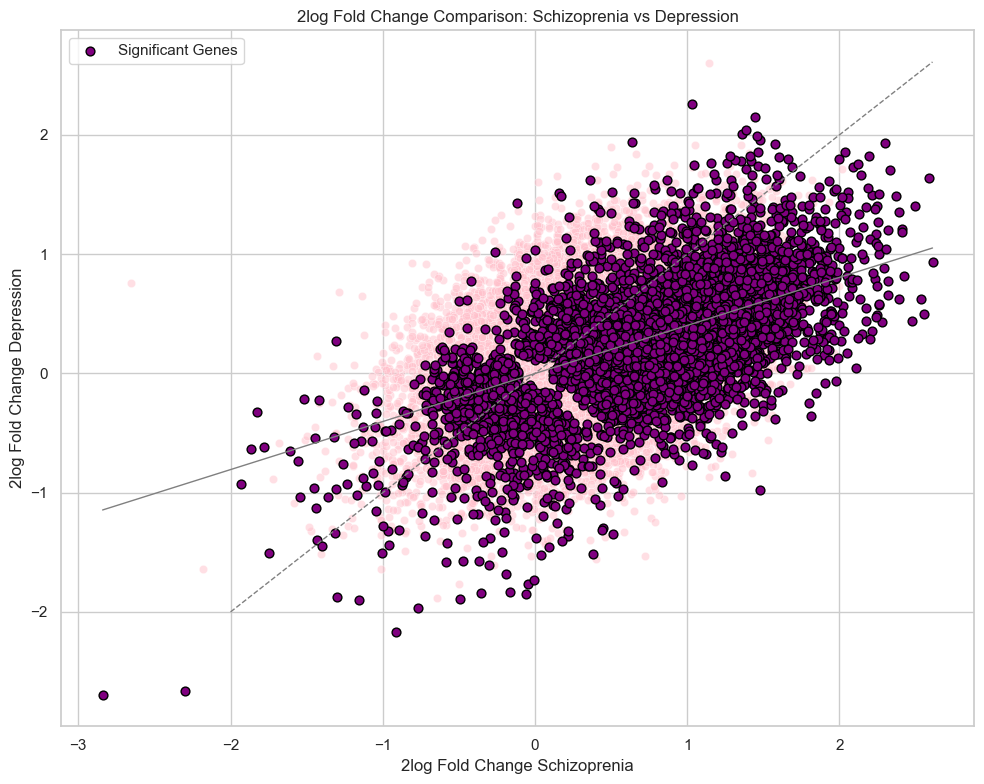

In [78]:
#nAcc

plot_fold_change(res_schiz_nAcc, res_mdd_nAcc, "Schizoprenia", 'Depression')

Correlation Coefficient: 0.4271031549558905
Slope (Угол наклона): 0.35092120748572986
Intercept: -0.03863419620396555


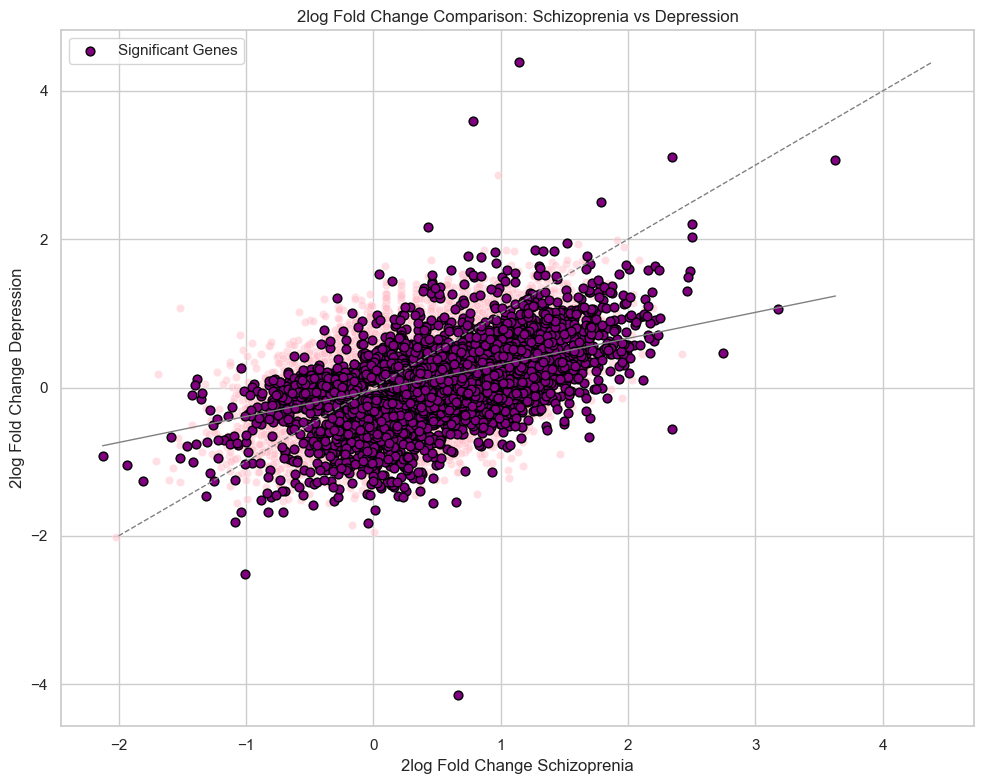

In [79]:
#AnCg

plot_fold_change(res_schiz_AnCg, res_mdd_AnCg, "Schizoprenia", 'Depression')

Correlation Coefficient: 0.2848758326438706
Slope (Угол наклона): 0.28196247178762507
Intercept: 0.0711559076532012


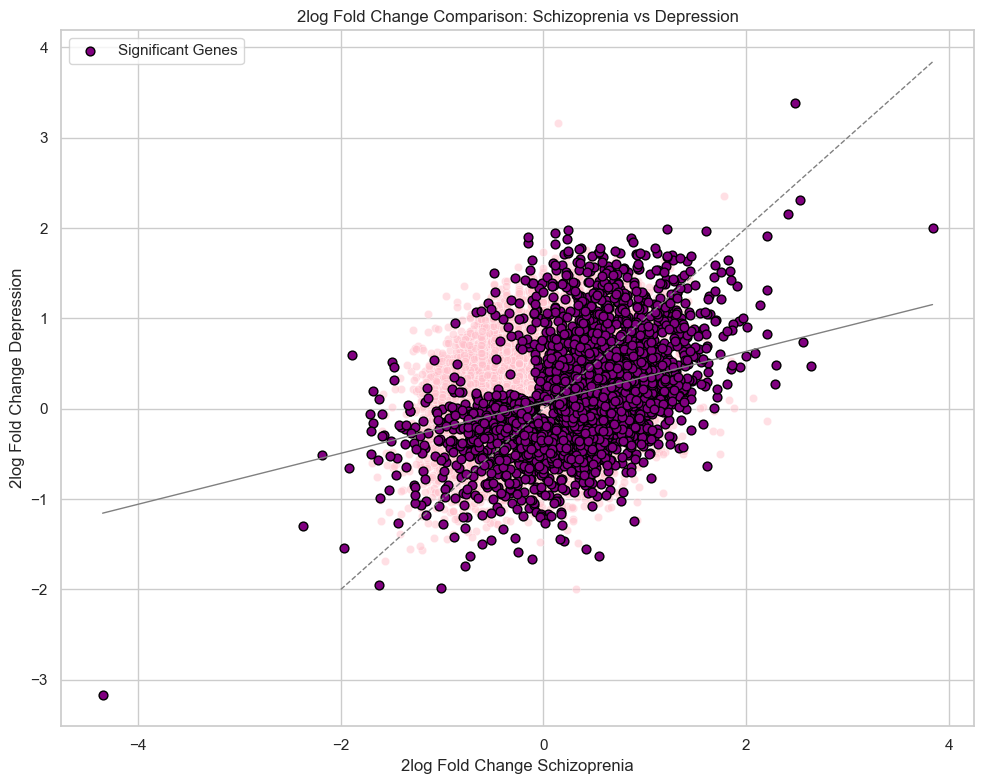

In [80]:
#DLPFC

plot_fold_change(res_schiz_DLPFC, res_mdd_DLPFC, "Schizoprenia", 'Depression')

## Variance estimation

In [84]:
data = data.T

In [85]:
diseases = samples['Disease'].unique()
regions = samples['Region'].unique()

# d.MultiIndex.from_product creates two levels of indexes 
# so that all combinations are present
index = pd.MultiIndex.from_product([diseases, regions], names=['Disease', 'Region'])

variances = pd.DataFrame(index=data.index, columns=index)

In [86]:
for disease in diseases:
    for region in regions:
        # taking the needed samples
        condition = (samples['Disease'] == disease) & (samples['Region'] == region)
        samples_for_condition = samples[condition].index
        
        # if there are samples
        if not samples_for_condition.empty:
            # taking expression data for specified samples
            filtered_data = data.loc[:, samples_for_condition]
            # each row is a gene and we are calculating variance for each for taken data
            variances[(disease, region)] = filtered_data.var(axis=1, ddof=1)

display(variances)

Disease                     C                                         M  \
Region                   AnCg          nAcc         DLPFC          AnCg   
gene_id                                                                   
ENSG00000223972  7.663043e-01  7.359307e-01  5.923913e-01  2.155797e-01   
ENSG00000227232  4.434332e+03  2.546643e+03  8.038949e+03  4.593737e+03   
ENSG00000240361  2.318841e-01  4.415584e-01  1.141304e-01  1.130435e+00   
ENSG00000238009  8.505435e+00  6.279221e+00  4.693841e+00  7.905797e+00   
ENSG00000233750  1.210870e+01  1.677922e+01  3.214493e+01  1.028804e+01   
...                       ...           ...           ...           ...   
ENSG00000198695  9.233257e+08  6.863298e+08  9.793180e+08  1.114965e+09   
ENSG00000210194  9.836957e-01  1.593074e+00  1.418478e+00  8.532609e-01   
ENSG00000198727  2.721324e+10  2.736069e+10  5.361747e+10  3.051872e+10   
ENSG00000210195  3.199928e+02  1.021333e+03  4.469982e+02  6.662536e+02   
ENSG00000210196  1.443899e+05  2.395350e+05  2.059419e+05  1.385521e+05   

Disease                                                 S                \
Region                   nAcc         DLPFC          AnCg          nAcc   
gene_id                                                                   
ENSG00000223972  3.030303e-01  3.122530e-01  1.956522e-01  3.517787e-01   
ENSG00000227232  4.992989e+03  6.140810e+03  1.418456e+04  6.292929e+03   
ENSG00000240361  2.885281e+00  1.347826e+00  1.141304e-01  4.229249e-01   
ENSG00000238009  1.896970e+01  1.181818e+01  2.896739e+00  6.905138e+00   
ENSG00000233750  2.168571e+02  1.589723e+01  6.967391e+01  1.220791e+02   
...                       ...           ...           ...           ...   
ENSG00000198695  1.393250e+09  6.550812e+08  4.274953e+09  1.060422e+10   
ENSG00000210194  2.545671e+01  5.217391e-01  3.971014e+00  1.766403e+01   
ENSG00000198727  7.447559e+10  3.349094e+10  4.325917e+10  2.863413e+11   
ENSG00000210195  2.267576e+03  1.841874e+03  9.443188e+02  6.804312e+03   
ENSG00000210196  3.655096e+05  1.323392e+05  3.044050e+05  1.711346e+06   

Disease                        
Region                  DLPFC  
gene_id                        
ENSG00000223972  4.764493e-01  
ENSG00000227232  1.124286e+04  
ENSG00000240361  4.166667e-02  
ENSG00000238009  6.000000e+00  
ENSG00000233750  6.112862e+01  
...                       ...  
ENSG00000198695  3.681659e+09  
ENSG00000210194  1.331522e+00  
ENSG00000198727  6.233027e+10  
ENSG00000210195  1.118370e+03  
ENSG00000210196  3.195075e+05  

[51720 rows x 9 columns]

The mean is typically calculated as x.sum() / N, where N = len(x). If, however, ddof is specified, the divisor N - ddof is used instead. In standard statistical practice, ddof=1 provides an unbiased estimator of the variance of a hypothetical infinite population.

### Test the variance vectors for normality


In [87]:
regions

array(['AnCg', 'nAcc', 'DLPFC'], dtype=object)

In [88]:
diseases

array(['C', 'M', 'S'], dtype=object)

In [89]:

for disease in diseases:
    for region in regions:

        vector = variances[(disease, region)]  
        
        #Shapiro-Wilk Test
        stat, p_value = shapiro(vector)
        
        print(f"Region: {region}, Disease: {disease}, Shapiro-Wilk Test p-value: {p_value}")

Region: AnCg, Disease: C, Shapiro-Wilk Test p-value: 0.0
Region: nAcc, Disease: C, Shapiro-Wilk Test p-value: 0.0
Region: DLPFC, Disease: C, Shapiro-Wilk Test p-value: 0.0
Region: AnCg, Disease: M, Shapiro-Wilk Test p-value: 0.0
Region: nAcc, Disease: M, Shapiro-Wilk Test p-value: 0.0
Region: DLPFC, Disease: M, Shapiro-Wilk Test p-value: 0.0
Region: AnCg, Disease: S, Shapiro-Wilk Test p-value: 0.0
Region: nAcc, Disease: S, Shapiro-Wilk Test p-value: 0.0
Region: DLPFC, Disease: S, Shapiro-Wilk Test p-value: 0.0


The null hypothesis of the Shapiro-Wilk test is that the data is normally distributed.
We can conclude that in our case the data is not normally distributed.

The **Mann-Whitney test** is well suited for such cases.

How the test works:
    
- Data ranking: All observations from both groups are combined and ranked together, starting with the smallest value.

- Rank summation: The sum of the ranks is calculated for each group.

- Calculating the U statistic: Using the rank sums and sample sizes, the U statistic is calculated.

- Determining Significance: The U statistic is compared to the critical values from the Mann-Whitney U-statistic distribution table to determine if the differences between groups are statistically significant.


In [90]:
for region in regions:
    vector_s = variances[('S', region)]
    vector_c = variances[('C', region)]
    
    stat_sc, p_value_sc = mannwhitneyu(vector_s, vector_c, alternative='two-sided')
    median_compare_sc = 'S > C' if np.median(vector_s) > np.median(vector_c) else 'C > S' if np.median(vector_c) > np.median(vector_s) else 'Equal'
    print(f"{region} S vs C: p-value = {p_value_sc}, Median comparison: {median_compare_sc}")
    
    vector_m = variances[('M', region)]
    
    stat_mc, p_value_mc = mannwhitneyu(vector_m, vector_c, alternative='two-sided')
    median_compare_mc = 'M > C' if np.median(vector_m) > np.median(vector_c) else 'C > M' if np.median(vector_c) > np.median(vector_m) else 'Equal'
    print(f"{region} M vs C: p-value = {p_value_mc}, Median comparison: {median_compare_mc}")


AnCg S vs C: p-value = 2.058238549090701e-07, Median comparison: S > C
AnCg M vs C: p-value = 2.0915441550963993e-10, Median comparison: C > M
nAcc S vs C: p-value = 1.9617534100094332e-97, Median comparison: S > C
nAcc M vs C: p-value = 2.4390727924454204e-06, Median comparison: M > C
DLPFC S vs C: p-value = 0.04566432855209843, Median comparison: S > C
DLPFC M vs C: p-value = 9.879462245643496e-19, Median comparison: M > C


In [91]:
variances_melted = variances.reset_index().melt(id_vars=["gene_id"], var_name=["Disease", "Region"], value_name="Value")
variances_melted

,gene_id,Disease,Region,Value
0,ENSG00000223972,C,AnCg,7.663043e-01
1,ENSG00000227232,C,AnCg,4.434332e+03
2,ENSG00000240361,C,AnCg,2.318841e-01
3,ENSG00000238009,C,AnCg,8.505435e+00
4,ENSG00000233750,C,AnCg,1.210870e+01
...,...,...,...,...
465475,ENSG00000198695,S,DLPFC,3.681659e+09
465476,ENSG00000210194,S,DLPFC,1.331522e+00
465477,ENSG00000198727,S,DLPFC,6.233027e+10
465478,ENSG00000210195,S,DLPFC,1.118370e+03


In [92]:
# The log1p function is used to prevent logarithmization of zero values,
# since log(0) is undefined

variances_melted['LogValue'] = np.log1p(variances_melted['Value'])
variances_melted

,gene_id,Disease,Region,Value,LogValue
0,ENSG00000223972,C,AnCg,7.663043e-01,0.568889
1,ENSG00000227232,C,AnCg,4.434332e+03,8.397358
2,ENSG00000240361,C,AnCg,2.318841e-01,0.208545
3,ENSG00000238009,C,AnCg,8.505435e+00,2.251864
4,ENSG00000233750,C,AnCg,1.210870e+01,2.573276
...,...,...,...,...,...
465475,ENSG00000198695,S,DLPFC,3.681659e+09,22.026629
465476,ENSG00000210194,S,DLPFC,1.331522e+00,0.846521
465477,ENSG00000198727,S,DLPFC,6.233027e+10,24.855713
465478,ENSG00000210195,S,DLPFC,1.118370e+03,7.020521


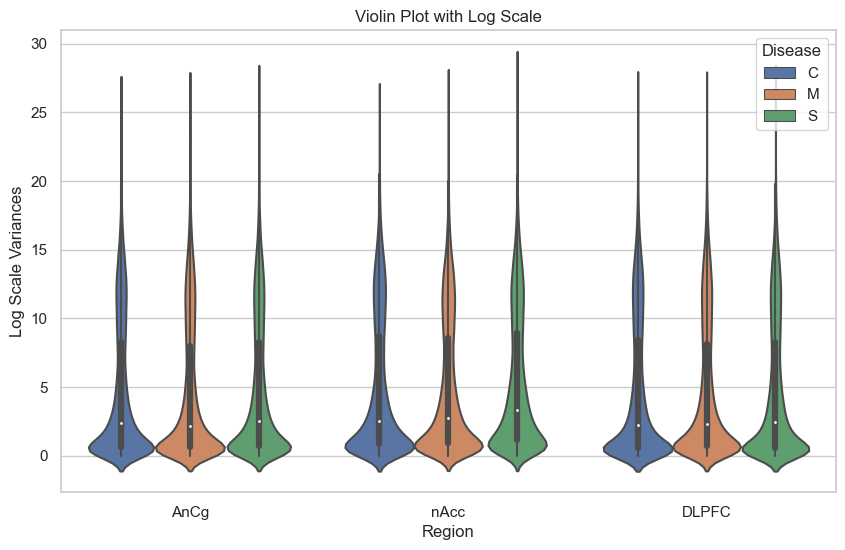

In [93]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(variances_melted, x='Region', y='LogValue', hue='Disease')# split=True)
plt.title('Violin Plot with Log Scale')
plt.ylabel('Log Scale Variances')
plt.show()

## Gene encoding

Пробы закодированы разным способом в первой статье **(Affymetrix Human Genome U133 Plus 2.0 Array)** и во второй статье **(ENSEMBL Gene ID)**. Поэтому приведем эти кодировки к единой, чтобы возможно было сопоставить результаты. 

In [94]:
gene_encoding = pd.read_excel('gene_encoding.xlsx')
#gene_encoding = gene_encoding.drop(gene_encoding.columns[0])
gene_encoding.columns = ['0', 'Ensmbl', 'Aff']
gene_encoding = gene_encoding.set_index('0')
gene_encoding

,Ensmbl,Aff
0,,
0,ENSG00000166436,213748_at
1,ENSG00000166436,229466_at
2,ENSG00000166436,237679_at
3,ENSG00000166436,NaN
4,ENSG00000177990,230158_at
...,...,...
6,ENSG00000227395,NaN
7,ENSG00000235213,NaN
8,ENSG00000250406,1561084_at


## Results comparison for DLPFC between datasets


This paper, as well as https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6533277/, investigates gene expression levels in schizophrenia and depression in DLPFC. Therefore, we can compare the results.

In [95]:
datasets = {}

#article 1
for region in ['hip', 'pfc', 'str']:
    datasets[f'{region}_SZ_affymetrix'] = pd.read_excel(f'{region}_schiz_affymetrix.xlsx')
    datasets[f'{region}_MDD_affymetrix'] = pd.read_excel(f'{region}_MDD_affymetrix.xlsx')
    
#lipids
for region in ['PFC', 'CgGr']:
    datasets[f'{region}_SZ_lipids'] = pd.read_excel(f'{region}_SZ_lipids.xlsx')
    datasets[f'{region}_MDD_lipids'] = pd.read_excel(f'{region}_MDD_lipids.xlsx')
    
#article 2
for region in ['AnCg', 'nAcc', 'DLPFC']:
    datasets[f'{region}_SZ_seq'] = globals()[f'res_schiz_{region}'].copy()
    datasets[f'{region}_MDD_seq'] = globals()[f'res_mdd_{region}'].copy()
    
    


- **gene_encoding** - table with gene encoding matching


We need to compare fold-change vectors for each gene (one gene in two different encodings), calculate the correlation

In [96]:
res_mdd_DLPFC

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,fold_change
gene_id,,,,,,,
ENSG00000223972,0.329384,-0.264933,0.963835,-0.274874,0.783413,0.99998,0.832237
ENSG00000227232,180.791885,0.011403,0.163906,0.069571,0.944535,0.99998,1.007935
ENSG00000240361,0.203079,1.079097,1.419119,0.760399,0.447016,0.99998,2.112713
ENSG00000238009,3.897813,0.071289,0.288344,0.247237,0.804725,0.99998,1.050655
ENSG00000233750,7.476448,-0.269884,0.288161,-0.936573,0.348978,0.99998,0.829386
...,...,...,...,...,...,...,...
ENSG00000198695,70034.033228,-0.125813,0.221933,-0.566895,0.570786,0.99998,0.916488
ENSG00000210194,0.760342,-0.497616,0.619375,-0.803417,0.421734,0.99998,0.708276
ENSG00000198727,440683.472946,-0.097164,0.170042,-0.571411,0.567721,0.99998,0.934869


In [97]:
datasets[f'pfc_MDD_affymetrix']

,ID_REF,Fold Change,pvalue,padj,log2FoldChange
0,1007_s_at,1.052407,0.452148,0.950162,0.073692
1,1053_at,0.971208,0.413451,0.940621,-0.042148
2,117_at,1.048339,0.185068,0.898458,0.068106
3,121_at,1.033072,0.536771,0.960479,0.046941
4,1255_g_at,0.928552,0.456151,0.950484,-0.106945
...,...,...,...,...,...
49214,AFFX-r2-Ec-bioC-5_at,0.935874,0.250372,0.915470,-0.095614
49215,AFFX-r2-Ec-bioD-3_at,0.980575,0.584254,0.967589,-0.028301
49216,AFFX-r2-Ec-bioD-5_at,0.972727,0.485212,0.952423,-0.039893
49217,AFFX-r2-P1-cre-3_at,0.988196,0.518410,0.958218,-0.017130


In [98]:
mdd_merged = pd.merge(pd.merge(datasets[f'pfc_MDD_affymetrix'], gene_encoding, left_on='ID_REF', right_on='Aff'),
                      res_mdd_DLPFC, left_on='Ensmbl', right_on='gene_id')#, suffixes=('_Affymetrix', '_Ensembl'))
schiz_merged = pd.merge(pd.merge(datasets[f'pfc_SZ_affymetrix'], gene_encoding, left_on='ID_REF', right_on='Aff'),
                        res_schiz_DLPFC, left_on='Ensmbl', right_on='gene_id')#, suffixes=('_Affymetrix', '_Ensembl'))


# Correlation

mdd_corr, p_value_mdd = pearsonr(mdd_merged['Fold Change'], mdd_merged['fold_change'])

print(f"Correlation coefficient: {mdd_corr}")
print(f"P-value: {p_value_mdd}")

schiz_corr, p_value_schiz = pearsonr(schiz_merged['Fold Change'], schiz_merged['fold_change'])

print(f"Correlation coefficient: {schiz_corr}")
print(f"P-value: {p_value_schiz}")



Correlation coefficient: 0.08793892234414952
P-value: 1.5557922788124717e-69
Correlation coefficient: 0.3383080188011474
P-value: 0.0


In [99]:
#taking mean 
mdd_merged_grouped = (mdd_merged
                      .groupby('Ensmbl').agg(Fold_Change = ('Fold Change', np.mean), 
                                             fold_change= ('fold_change', np.mean))
                     )
schiz_merged_grouped = (schiz_merged
                      .groupby('Ensmbl').agg(Fold_Change = ('Fold Change', np.mean), 
                                             fold_change = ('fold_change', np.mean))
                     )
mdd_corr, p_value_mdd = pearsonr(mdd_merged_grouped['Fold_Change'], mdd_merged_grouped['fold_change'])

print(f"Correlation coefficient: {mdd_corr}")
print(f"P-value: {p_value_mdd}")

schiz_corr, p_value_schiz = pearsonr(schiz_merged_grouped['Fold_Change'], schiz_merged_grouped['fold_change'])

print(f"Correlation coefficient: {schiz_corr}")
print(f"P-value: {p_value_schiz}")

Correlation coefficient: 0.09929376454030475
P-value: 1.635160496156714e-45
Correlation coefficient: 0.40248955498866057
P-value: 0.0


How to calculate p-value for correlation coefficient:

https://courses.lumenlearning.com/introstats1/chapter/testing-the-significance-of-the-correlation-coefficient/

**Null Hypothesis H0:** The population correlation coefficient IS NOT significantly different from zero. There IS NOT a significant linear relationship(correlation) between x and y in the population.


**Alternate Hypothesis Ha:** The population correlation coefficient IS significantly DIFFERENT FROM zero. There IS A SIGNIFICANT LINEAR RELATIONSHIP (correlation) between x and y in the population.


In [100]:
list_DEG_mdd_ensembl = []
list_DEG_schiz_ensembl = []
list_DEG_mdd_affymetrix = []
list_DEG_schiz_affymetrix = []


list_DEG_mdd_ensembl.append(up_down(res_mdd_DLPFC).query('Regulation != 0').index)
list_DEG_schiz_ensembl.append(up_down(res_schiz_DLPFC).query('Regulation != 0').index)


list_DEG_mdd_affymetrix.append(up_down(datasets['pfc_MDD_affymetrix']).query('Regulation != 0').index)
list_DEG_schiz_affymetrix.append(up_down(datasets['pfc_SZ_affymetrix']).query('Regulation != 0').index)

In [101]:
mdd_merged

,ID_REF,Fold Change,pvalue_x,padj_x,log2FoldChange_x,Ensmbl,Aff,baseMean,log2FoldChange_y,lfcSE,stat,pvalue_y,padj_y,fold_change
0,1007_s_at,1.052407,0.452148,0.950162,0.073692,ENSG00000204580,1007_s_at,6457.420523,-0.440255,0.215549,-2.042483,0.041104,0.99998,0.737004
1,207169_x_at,1.042560,0.555767,0.963665,0.060130,ENSG00000204580,207169_x_at,6457.420523,-0.440255,0.215549,-2.042483,0.041104,0.99998,0.737004
2,208779_x_at,1.057744,0.360258,0.930551,0.080990,ENSG00000204580,208779_x_at,6457.420523,-0.440255,0.215549,-2.042483,0.041104,0.99998,0.737004
3,210749_x_at,1.023324,0.757950,0.985533,0.033263,ENSG00000204580,210749_x_at,6457.420523,-0.440255,0.215549,-2.042483,0.041104,0.99998,0.737004
4,1053_at,0.971208,0.413451,0.940621,-0.042148,ENSG00000049541,1053_at,402.386557,0.030113,0.064581,0.466292,0.641006,0.99998,1.021092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40016,57739_at,0.958019,0.189771,0.899270,-0.061873,ENSG00000264070,57739_at,63.495765,0.086204,0.140135,0.615147,0.538458,0.99998,1.061573
40017,65585_at,1.024845,0.678625,0.979238,0.035406,ENSG00000164845,65585_at,52.930167,0.114822,0.120642,0.951765,0.341216,0.99998,1.082842
40018,65585_at,1.024845,0.678625,0.979238,0.035406,ENSG00000186523,65585_at,169.893276,0.102537,0.121509,0.843867,0.398744,0.99998,1.073660
40019,AFFX-HUMRGE/M10098_5_at,1.154449,0.419116,0.941595,0.207204,ENSG00000264063,AFFX-HUMRGE/M10098_5_at,22.332476,-0.736585,0.389210,-1.892512,0.058423,0.99998,0.600158


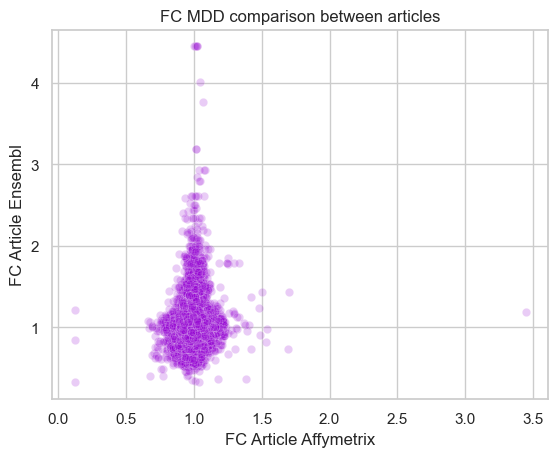

In [102]:
plt.xlabel(f'FC Article Affymetrix')
plt.ylabel(f'FC Article Ensembl')
plt.title(f'FC MDD comparison between articles')
sns.scatterplot(x = 'Fold Change', y = 'fold_change', data = mdd_merged, color = 'darkviolet', alpha=0.2);
plt.show() 

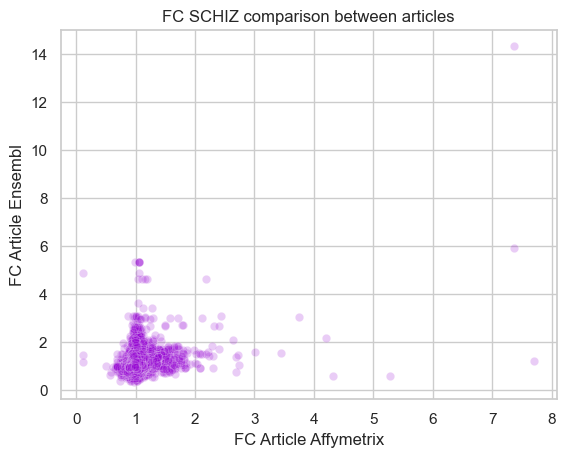

In [103]:
plt.xlabel(f'FC Article Affymetrix')
plt.ylabel(f'FC Article Ensembl')
plt.title(f'FC SCHIZ comparison between articles')
sns.scatterplot(x = 'Fold Change', y = 'fold_change', data = schiz_merged, color = 'darkviolet', alpha=0.2);

plt.show()

## Сhange proportion comparison between articles and lipids

In [104]:
regions

array(['AnCg', 'nAcc', 'DLPFC'], dtype=object)

In [107]:
def expession_percent(data):
    condition_upregulated = (data['log2FoldChange'] > 0) & (data['padj'] < 0.05)
    condition_downregulated = (data['log2FoldChange'] < 0) & (data['padj'] < 0.05)


    up_percent = condition_upregulated.mean() * 100
    down_percent = condition_downregulated.mean() * 100
    
    up_count = condition_upregulated.sum()
    down_count = condition_downregulated.sum()
    #corr = pearsonr(df_schiz['log2FoldChange'], df_mdd['log2FoldChange'])

    return up_percent, down_percent, up_count, down_count


results = []

for name, dataset in datasets.items():
    up_percent, down_percent, up_count, down_count = expession_percent(dataset)
    results.append({'Dataset': name, 'Upregulated (%)': up_percent, 'Downregulated (%)': down_percent, 'Upregulated ': up_count, 'Downregulated':down_count})

results_df = pd.DataFrame(results)

# Вывод результатов
display(results_df)

,Dataset,Upregulated (%),Downregulated (%),Upregulated,Downregulated
0,hip_SZ_affymetrix,4.896483,3.854203,2410,1897
1,hip_MDD_affymetrix,0.000000,0.000000,0,0
2,pfc_SZ_affymetrix,0.000000,0.000000,0,0
3,pfc_MDD_affymetrix,0.000000,0.000000,0,0
4,str_SZ_affymetrix,0.000000,0.000000,0,0
5,str_MDD_affymetrix,0.000000,0.000000,0,0
6,PFC_SZ_lipids,0.000000,0.000000,0,0
7,PFC_MDD_lipids,0.000000,0.000000,0,0
8,CgGr_SZ_lipids,0.000000,0.000000,0,0
9,CgGr_MDD_lipids,0.255102,0.127551,2,1


In [108]:
results_df[['Region', 'Disease', 'Type']] = results_df.Dataset.str.split('_', expand=True)
#results_df = results_df.drop('Dataset')
#results_df = results_df
results_df.sort_values(by=['Region', 'Disease', 'Type']).reset_index(drop=True)


,Dataset,Upregulated (%),Downregulated (%),Upregulated,Downregulated,Region,Disease,Type
0,AnCg_MDD_seq,0.001933,0.000000,1,0,AnCg,MDD,seq
1,AnCg_SZ_seq,5.291957,1.285770,2737,665,AnCg,SZ,seq
2,CgGr_MDD_lipids,0.255102,0.127551,2,1,CgGr,MDD,lipids
3,CgGr_SZ_lipids,0.000000,0.000000,0,0,CgGr,SZ,lipids
4,DLPFC_MDD_seq,0.000000,0.000000,0,0,DLPFC,MDD,seq
5,DLPFC_SZ_seq,0.011601,0.007734,6,4,DLPFC,SZ,seq
6,PFC_MDD_lipids,0.000000,0.000000,0,0,PFC,MDD,lipids
7,PFC_SZ_lipids,0.000000,0.000000,0,0,PFC,SZ,lipids
8,hip_MDD_affymetrix,0.000000,0.000000,0,0,hip,MDD,affymetrix
9,hip_SZ_affymetrix,4.896483,3.854203,2410,1897,hip,SZ,affymetrix


In [137]:
keys = list(datasets.keys())
#need to put ids as index in datasets
    for i, key in enumerate(keys[:-6]):  # except last 6 datasets 
        datasets[key].set_index(datasets[key].columns[0], inplace=True)


In [154]:
def compare_corr(datasets):
   
    keys = list(datasets.keys())
    corr_results = {}

    
    # compare first and second dataset in datasets, 3 and 4 ...
    for i in range(0, len(keys), 2):
    
        df_sz = datasets[keys[i]]
        df_mdd = datasets[keys[i+1]]
        
        significant_genes = (df_sz.query('pvalue < 0.05').index).union(df_mdd.query('pvalue < 0.05').index)
        #correlation = np.corrcoef(df_sz[df_sz.index.isin(significant_genes)].log2FoldChange, df_mdd[df_mdd.index.isin(significant_genes)].log2FoldChange)[0, 1]
        correlation = (df_sz[df_sz.index.isin(significant_genes)].log2FoldChange).corr(df_mdd[df_mdd.index.isin(significant_genes)].log2FoldChange)

       
        corr_results[(keys[i], keys[i + 1])] = correlation
    return corr_results  

corr_results = compare_corr(datasets)
pd.DataFrame(list(corr_results.values()), index=pd.MultiIndex.from_tuples(corr_results.keys()), columns=['Correlation'])


,,Correlation
hip_SZ_affymetrix,hip_MDD_affymetrix,0.349936
pfc_SZ_affymetrix,pfc_MDD_affymetrix,0.492415
str_SZ_affymetrix,str_MDD_affymetrix,0.323560
PFC_SZ_lipids,PFC_MDD_lipids,0.558554
CgGr_SZ_lipids,CgGr_MDD_lipids,0.898371
AnCg_SZ_seq,AnCg_MDD_seq,0.430039
nAcc_SZ_seq,nAcc_MDD_seq,0.634214
DLPFC_SZ_seq,DLPFC_MDD_seq,0.459529


In [ ]:
.corr() или np.corrcoef()???

## Pathway enrichment analysis

https://www.youtube.com/watch?v=H1cUs6pql9s

https://www.youtube.com/watch?v=egO7Lt92gDY

https://www.youtube.com/watch?v=Yi4d7JIlAsM

https://medium.com/omics-diary/how-to-use-gseapy-for-pathway-enrichment-analysis-67a1aab1002d

In [111]:
import gseapy 
from gseapy.plot import barplot, dotplot
from gseapy.plot import gseaplot

In [112]:
DEG =[]

for r in regions:
    for d in ['schiz', 'mdd']:
        deg = up_down(globals()[f'res_{d}_{r}']).query('Regulation == 1 or Regulation == -1').index
        DEG.extend(deg)
            
        
unique_DEG = set(DEG)

DEG_list = list(unique_DEG)


print("DEG:", len(DEG_list))

DEG: 5115


In [113]:
all_genes =list(set(data.index))
print(f'All Genes: {len(all_genes)}')

All Genes: 51720


https://nbviewer.org/gist/newgene/6771106

In [114]:
%%time
import mygene
mg = mygene.MyGeneInfo()
geneList = list(set(data.index))
geneSyms = mg.querymany(geneList , scopes='ensembl.gene', fields='symbol', species='human', returnall=True, as_dataframe=True)

4 input query terms found dup hits:	[('ENSG00000230373', 2), ('ENSG00000249738', 2), ('ENSG00000268674', 3), ('ENSG00000188660', 2)]
4082 input query terms found no hit:	['ENSG00000253264', 'ENSG00000203849', 'ENSG00000236558', 'ENSG00000202077', 'ENSG00000221570', 'ENS


CPU times: user 2.12 s, sys: 411 ms, total: 2.53 s
Wall time: 2min 34s


In [115]:
gene_names = geneSyms['out'].reset_index()[['query','symbol']]

In [116]:
gene_names

,query,symbol
0,ENSG00000252412,Y_RNA
1,ENSG00000253264,NaN
2,ENSG00000270587,FAM136DP
3,ENSG00000214405,RAP1BP2
4,ENSG00000259050,CHORDC2P
...,...,...
51720,ENSG00000196890,H2BC26
51721,ENSG00000267035,NaN
51722,ENSG00000251416,LOC105377559
51723,ENSG00000227040,LOC285453


https://gseapy.readthedocs.io/en/latest/gseapy_example.html

In [117]:
all_genes = pd.DataFrame(all_genes, columns = ['query'])

In [118]:
all_genes

,query
0,ENSG00000252412
1,ENSG00000253264
2,ENSG00000270587
3,ENSG00000214405
4,ENSG00000259050
...,...
51715,ENSG00000196890
51716,ENSG00000267035
51717,ENSG00000251416
51718,ENSG00000227040


In [119]:
gene_names = gene_names.merge(pd.DataFrame(all_genes, columns = ['query']), on = 'query')

In [120]:
len(all_genes)

51720

In [121]:
gene_names.symbol.dropna()

0               Y_RNA
2            FAM136DP
3             RAP1BP2
4            CHORDC2P
7           LOC400036
             ...     
51719          GNPATP
51720          H2BC26
51722    LOC105377559
51723       LOC285453
51724            SGO2
Name: symbol, Length: 38564, dtype: object

In [122]:
pd.Series(gene_names.symbol.dropna()).to_csv('all_genes.txt', index=False, header=False)

In [123]:
gene_names

,query,symbol
0,ENSG00000252412,Y_RNA
1,ENSG00000253264,NaN
2,ENSG00000270587,FAM136DP
3,ENSG00000214405,RAP1BP2
4,ENSG00000259050,CHORDC2P
...,...,...
51720,ENSG00000196890,H2BC26
51721,ENSG00000267035,NaN
51722,ENSG00000251416,LOC105377559
51723,ENSG00000227040,LOC285453


In [124]:
gene_names.query('query in @DEG_list').dropna().symbol.tolist()

['TNS1-AS1',
 'RPL36AP45',
 'RPL23AP43',
 'MARK1',
 'NANOGP8',
 'CHRDL1',
 'TMEM176A',
 'IGHEP2',
 'HAUS8',
 'TGFBR3',
 'PERP',
 'ITGA10',
 'RN7SL351P',
 'STAU2-AS1',
 'NUP210L',
 'XKR4-AS1',
 'RAD17',
 'ZNF782',
 'SPCS3',
 'PABPC1P3',
 'LINC02587',
 'CACNA1C-AS2',
 'EEF1A1P25',
 'CDC42P7',
 'PAM16',
 'PRRT3-AS1',
 'ATP6V1A',
 'ZDHHC7',
 'MAL2-AS1',
 'GPRASP3',
 'RNU6-611P',
 'SMTN',
 'MTND6P4',
 'LOC100132280',
 'JPX',
 'LINC00861',
 'CSTBP1',
 'NID1',
 'POM121L14P',
 'SLC9A7',
 'LHFPL3-AS1',
 'CTTN-DT',
 'SRP72P2',
 'NSUN6',
 'TMEM121B',
 'IDH3A',
 'LYG1',
 'RPL7L1P12',
 'ELP4',
 'DDX55P1',
 'LINC01605',
 'LYPLA1',
 'RPS12P27',
 'PARK7P2',
 'LOC124900397',
 'FOSB',
 'PDE2A-AS1',
 'PTGIR',
 'TMEM167B-DT',
 'RPS26P20',
 'SIAE',
 'AHCYL1',
 'RAET1E',
 'ZBTB42',
 'RHOJ',
 'CELF2-AS2',
 'PRDX3P2',
 'RNU6-786P',
 'Y_RNA',
 'RPS2P44',
 'RPL21P48',
 'SIAH2-AS1',
 'CTDSPL',
 'GMPR',
 'HNRNPCP6',
 'PI4KA',
 'TNFRSF10A',
 'SPDYC',
 'RNU6-435P',
 'VPS8',
 'ELOBP1',
 'MIR4480',
 'TMEM263',
 'HNRN

In [125]:
enr_bg = gseapy.enrichr(gene_list = gene_names.query('query in @DEG_list').dropna().symbol.tolist(),
                 gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human',
                            'GO_Molecular_Function_2023',
                            'GO_Cellular_Component_2023',
                            'GO_Biological_Process_2023',
                             #'Disease_Signatures_from_GEO_down_2014',
                             #'Disease_Signatures_from_GEO_up_2014'
                           ],
                 # organism='human', # organism argment is ignored because we input a background
                 background="all_genes.txt",
                 outdir=None, # don't write to disk
                )

In [126]:
# gp.get_library_name(organism='human')

In [127]:

enr_bg.results

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Fatty Acid Metabolism,0.001550,0.057528,0,0,1.983913,12.835393,IDI1;ACAA2;RETSAT;ECI2;ETFDH;HCCS;CPT2;ACSS1;G...
1,MSigDB_Hallmark_2020,Complement,0.003548,0.057528,0,0,1.772669,10.000202,CDA;DOCK4;SERPINA1;C1S;TMPRSS6;SERPINC1;C1R;NO...
2,MSigDB_Hallmark_2020,p53 Pathway,0.003839,0.057528,0,0,1.761938,9.800687,APP;CSRNP2;RETSAT;ABHD4;CD81;ITGB4;AK1;RNF19B;...
3,MSigDB_Hallmark_2020,Interferon Gamma Response,0.005599,0.057528,0,0,1.727330,8.956414,IFITM3;CD86;CD40;IFITM2;EIF4E3;C1S;C1R;IFI35;S...
4,MSigDB_Hallmark_2020,Apoptosis,0.007322,0.057528,0,0,1.785632,8.779781,IFITM3;APP;RETSAT;ROCK1;HMGB2;CLU;LGALS3;CASP7...
...,...,...,...,...,...,...,...,...,...
5872,GO_Biological_Process_2023,Antimicrobial Humoral Immune Response Mediated...,0.998270,0.999203,0,0,0.151546,0.000262,F2
5873,GO_Biological_Process_2023,Cytoplasmic Translation (GO:0002181),0.999241,0.999635,0,0,0.201938,0.000153,SARS1;EIF3M
5874,GO_Biological_Process_2023,Translation (GO:0006412),0.999382,0.999635,0,0,0.414254,0.000256,MRPL42;MRPL53;SARS1;NDUFA7;MRPS16;MRPS22;MARS1...
5875,GO_Biological_Process_2023,Sensory Perception Of Smell (GO:0007608),0.999402,0.999635,0,0,0.380096,0.000227,OR2H2;OR7A5;OR10A2;OR13D1;BEST2;OR13C3;OR10AD1...


Several key metabolic pathways have been identified that play an important role in the pathogenesis of schizophrenia and depression. The importance of fatty acid metabolism and the complement system confirms the importance of inflammatory and metabolic processes in the development of these psychiatric disorders. The role of interferon gamma and the TNF-α/NF-κB signaling pathway emphasizes the link between immune dysfunction and
neuroinflammation in the pathogenesis of schizophrenia and depression.

### By regions

In [128]:
DEGs_by_region = {}  
for r in regions:
    region_DEGs = []  
    for d in ['schiz', 'mdd']:
        dataframe = globals()[f'res_{d}_{r}']
        deg = up_down(dataframe).query('Regulation == 1 or Regulation == -1').index
        region_DEGs.extend(deg)  

    DEGs_by_region[r] = list(set(region_DEGs))  


In [129]:
for region, DEG_list in DEGs_by_region.items():
    gene_symbols = gene_names.query('query in @DEG_list').dropna().symbol.tolist()
    enr_bg = gseapy.enrichr(gene_list=gene_symbols,
                            gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human',
                                       'GO_Molecular_Function_2023',
                                       'GO_Cellular_Component_2023',
                                       'GO_Biological_Process_2023'],
                            background="all_genes.txt",  
                            outdir=None)  

    print(f"Enrichment results for {region}:")
    display(enr_bg.res2d)

Enrichment results for AnCg:


,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Negative Regulation Of Cellular Component Orga...,0.000015,0.022678,0,0,3.858562,42.949979,OPRD1;GSK3B;RUBCN;HSPA8;CRACD;APOC3;GBA1;IRAK3...
1,GO_Biological_Process_2023,Protein Localization To Plasma Membrane (GO:00...,0.000023,0.022678,0,0,2.951585,31.564118,RAB3B;TMEM150A;CAV3;ROCK1;CD81;SMURF1;ZDHHC7;E...
2,GO_Biological_Process_2023,Protein Localization To Membrane (GO:0072657),0.000025,0.022678,0,0,2.546252,26.997827,RAB3B;ROCK1;CD81;ITGB2;ZDHHC7;PTN;F11R;TM9SF3;...
3,GO_Biological_Process_2023,Regulation Of Signal Transduction (GO:0009966),0.000034,0.022678,0,0,2.498593,25.738128,APP;GALNT11;YJEFN3;PXN;TULP3;ZDHHC7;CLU;RASGRP...
4,GO_Biological_Process_2023,Regulation Of Stress Fiber Assembly (GO:0051492),0.000034,0.022678,0,0,3.753433,38.584640,ROCK1;PXN;F11R;RHOC;PPM1E;SORBS3;CDC42;NELL1;T...
...,...,...,...,...,...,...,...,...,...
3944,GO_Biological_Process_2023,Positive Regulation Of Cysteine-Type Endopepti...,0.995738,0.996748,0,0,0.256944,0.001097,NDUFA13;LAPTM5
3945,GO_Biological_Process_2023,Ribonucleoprotein Complex Biogenesis (GO:0022613),0.996463,0.997095,0,0,0.249915,0.000885,C1ORF131;CUL4B
3946,GO_Biological_Process_2023,Ribosomal Small Subunit Biogenesis (GO:0042274),0.996590,0.997095,0,0,0.171896,0.000587,C1ORF131
3947,GO_Biological_Process_2023,DNA-templated Transcription (GO:0006351),0.999406,0.999469,0,0,0.284428,0.000169,NR4A2;TBP;CCNH;RREB1


Enrichment results for nAcc:


,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Positive Regulation Of RNA Metabolic Process (...,0.004750,0.999993,0,0,4.345934,23.248912,IL1B;NMD3;RIOK2;HNRNPLL;HSPA1A;RBM22
1,GO_Biological_Process_2023,Positive Regulation Of Tumor Necrosis Factor-M...,0.005388,0.999993,0,0,11.722102,61.232309,CASP4;HSPA1B;HSPA1A
2,GO_Biological_Process_2023,Leukocyte Tethering Or Rolling (GO:0050901),0.008049,0.999993,0,0,6.013258,28.997350,SELP;ROCK1;ITGB7;JAM2
3,GO_Biological_Process_2023,Regulation Of Mitochondrial Outer Membrane Per...,0.009955,0.999993,0,0,5.583585,25.738674,SLC35F6;MUL1;SLC25A5;HSPA1A
4,GO_Biological_Process_2023,Negative Regulation Of Mitochondrial Membrane ...,0.010728,0.999993,0,0,8.372466,37.967893,SLC35F6;SLC25A5;HSPA1A
...,...,...,...,...,...,...,...,...,...
2305,GO_Biological_Process_2023,Positive Regulation Of Transcription By RNA Po...,0.999989,0.999993,0,0,0.426827,0.000005,ARF4;EGR1;MYOCD;DDX3X;BTBD18;NOTCH4;FOS;ATAD2B...
2306,GO_Biological_Process_2023,Regulation Of Transcription By RNA Polymerase ...,0.999990,0.999993,0,0,0.570774,0.000006,ARF4;DDX3X;SLA2;N4BP2L2;MEOX1;EDNRB;ZMYM5;ZNF8...
2307,GO_Biological_Process_2023,Regulation Of Gene Expression (GO:0010468),0.999992,0.999993,0,0,0.443630,0.000003,DDX3X;ROCK1;PERM1;HNRNPLL;TTN;SCRT2;EFEMP1;RBB...
2308,GO_Biological_Process_2023,Regulation Of DNA-templated Transcription (GO:...,0.999993,0.999993,0,0,0.523638,0.000004,CD86;SUMO4;MYRFL;MEOX1;EFEMP1;GET1;CEP290;NKX3...


Enrichment results for DLPFC:


,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Chemical Synaptic Transmission (GO:0007268),0.001345,0.012642,0,0,47.353459,313.074655,SST;GABRE
1,GO_Biological_Process_2023,Cellular Response To Interleukin-2 (GO:0071352),0.001476,0.012642,0,0,902.500000,5882.883105,IL2RB
2,GO_Biological_Process_2023,Interleukin-2-Mediated Signaling Pathway (GO:0...,0.001476,0.012642,0,0,902.500000,5882.883105,IL2RB
3,GO_Biological_Process_2023,Ethanol Oxidation (GO:0006069),0.001476,0.012642,0,0,902.500000,5882.883105,ADH1B
4,GO_Biological_Process_2023,Positive Regulation Of Smooth Muscle Contracti...,0.001897,0.012642,0,0,676.839286,4241.953966,NMU
5,GO_Biological_Process_2023,Cellular Response To Interleukin-15 (GO:0071350),0.002108,0.012642,0,0,601.619048,3707.194530,IL2RB
6,GO_Biological_Process_2023,Interleukin-15-Mediated Signaling Pathway (GO:...,0.002108,0.012642,0,0,601.619048,3707.194530,IL2RB
7,GO_Biological_Process_2023,Positive Regulation Of Muscle Contraction (GO:...,0.002319,0.012642,0,0,541.442857,3284.831708,NMU
8,GO_Biological_Process_2023,Alpha-Beta T Cell Activation (GO:0046631),0.002950,0.012642,0,0,416.461538,2426.273644,TRBC2
9,GO_Biological_Process_2023,"Synaptic Transmission, GABAergic (GO:0051932)",0.002950,0.012642,0,0,416.461538,2426.273644,GABRE
